# Telecom Churn - Group Case Study

##  Problem Statement:


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.

In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 

Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, **telecom companies need to predict which customers are at high risk of churn.
In this project**, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

###  Understanding and defining churn: 
There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid**(customers pay/recharge with a certain amount in advance and then use the services).

In the **postpaid model**, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the **prepaid model**, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, **churn prediction is usually more critical (and non-trivial) for prepaid customers,** and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America 
This project is based on the Indian and Southeast Asian market.


## Business Goal:

**We are aiming to analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.**

As The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively, 

Thus ;**The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.**

In [1]:
'''
__Name__ = 'Ahmad Shhadeh'          __email__ = 'ashhadeh@yahoo.com'
__Name__ = 'Tejaswini Kamath'          __email__ = 'Shenoy.tejaswini@gmail.com'
__Date__ = '2021-05-01'
'''


## Step 1: Reading and Understanding the Data

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split #For splitting dataset
from sklearn.preprocessing import StandardScaler #For scaling data

# import statsmodels.api as sm #For Model building
from sklearn.linear_model import LogisticRegression #For Model building 
# from sklearn.feature_selection import RFE #Feature Selection
# from statsmodels.stats.outliers_influence import variance_inflation_factor #To calculate VIF for determining multicollinearity

from sklearn.decomposition import PCA, IncrementalPCA # For performing PCA
# from sklearn.decomposition import IncrementalPCA

from sklearn import metrics #For model evaluation
from sklearn.metrics import roc_curve ,  auc
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve

# import decision tree libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [3]:
telecom = pd.read_csv('telecom_churn_data.csv')#,index_col='mobile_number')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

<font color= red>Inferences</font>
<font color= blue>  
 1. There are 99999 rows and 226 columns in dataframe
 2. These 226 columns comprises of both dimensions (categorical value) and measures (numeric value)
</font> 

## Step 2: Data Preparation

In [7]:
# function to find the % of null values in a column. This is shown in the descending order.

def findnull(df):
    totalnull = df.isnull().sum().sort_values(ascending = False)
    percentnull = (df.isnull().sum()/len(df.index)*100).sort_values(ascending = False)
    nullinfo = pd.concat([totalnull,percentnull],axis=1)
    colnames = ['Total','%']
    nullinfo.columns = colnames
    return nullinfo


findnull(telecom)

,Total,%
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


**Identifying the categorical columns**

From the description, it appears most likely that columns described as Service schemes are most likely to be categorical variables. Investigating such columns.

In [8]:
colUniqueDict= {}
for cols in telecom.columns:
    if telecom[cols].value_counts().count()<5:
        colUniqueDict[cols]=telecom[cols].value_counts().count()

for key, value in colUniqueDict.items():
    print(key, ' : ', value)

circle_id  :  1
loc_og_t2o_mou  :  1
std_og_t2o_mou  :  1
loc_ic_t2o_mou  :  1
last_date_of_month_6  :  1
last_date_of_month_7  :  1
last_date_of_month_8  :  1
last_date_of_month_9  :  1
std_og_t2c_mou_6  :  1
std_og_t2c_mou_7  :  1
std_og_t2c_mou_8  :  1
std_og_t2c_mou_9  :  1
std_ic_t2o_mou_6  :  1
std_ic_t2o_mou_7  :  1
std_ic_t2o_mou_8  :  1
std_ic_t2o_mou_9  :  1
night_pck_user_6  :  2
night_pck_user_7  :  2
night_pck_user_8  :  2
night_pck_user_9  :  2
fb_user_6  :  2
fb_user_7  :  2
fb_user_8  :  2
fb_user_9  :  2


Here we observe that night_pack_user and fb_user have just 2 values each. Hence, interpreting these as categorical variables.

Additionally, some columns have single value i.e. no variance in data. These can be dropped.

In [9]:
catCols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
           'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
for cols in catCols:
    print(cols)
    telecom[cols]=telecom[cols].astype('object')


night_pck_user_6
night_pck_user_7
night_pck_user_8
night_pck_user_9
fb_user_6
fb_user_7
fb_user_8
fb_user_9


For categorical columns, we have values as 0 or 1 indicating whether these schemes are either not used or used.

However, for missing values, it is not clear which value needs to be used since these can be considered 'Missing completely at Random'. 

We will create a new category value for the missing values as '-1' for these.

In [10]:
for cols in catCols:
    telecom[cols].fillna(-1,inplace=True)
    telecom[cols]=telecom[cols].astype('object')
telecom[catCols].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0,0,0,-1,1,1,1,-1
1,-1,0,0,-1,-1,1,1,-1
2,-1,-1,-1,0,-1,-1,-1,1
3,-1,-1,-1,-1,-1,-1,-1,-1
4,0,-1,-1,-1,0,-1,-1,-1


In [11]:
# Dropping columns with no variance
dropCols = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
            'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','std_og_t2c_mou_6',
            'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
            'std_ic_t2o_mou_8','std_ic_t2o_mou_9']
telecom.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
            'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','std_og_t2c_mou_6',
            'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
            'std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis=1,inplace=True)

In [12]:
telecom.shape

(99999, 210)

In [13]:
# Imputing missing values for variables with missing value percentage <10%
missingFew = ["loc_ic_t2t_mou_9","loc_ic_t2m_mou_9","std_og_mou_9","og_others_9","spl_og_mou_9","loc_ic_t2f_mou_9",
              "loc_og_t2c_mou_9","loc_og_t2f_mou_9","loc_ic_mou_9","loc_og_mou_9","std_ic_t2t_mou_9",
              "std_ic_t2m_mou_9","std_ic_t2f_mou_9","std_og_t2f_mou_9","spl_ic_mou_9","isd_ic_mou_9","ic_others_9",
              "std_og_t2m_mou_9","std_og_t2t_mou_9","std_ic_mou_9","isd_og_mou_9","loc_og_t2m_mou_9",
              "loc_og_t2t_mou_9","roam_ic_mou_9","roam_og_mou_9","onnet_mou_9","offnet_mou_9","std_ic_t2f_mou_8",
              "isd_ic_mou_8","std_ic_t2m_mou_8","ic_others_8","loc_og_mou_8","std_ic_t2t_mou_8","spl_ic_mou_8",
              "roam_ic_mou_8","std_og_t2m_mou_8","onnet_mou_8","std_ic_mou_8","std_og_t2t_mou_8","loc_ic_mou_8",
              "offnet_mou_8","std_og_t2f_mou_8","loc_ic_t2f_mou_8","spl_og_mou_8","isd_og_mou_8","loc_ic_t2m_mou_8",
              "loc_og_t2t_mou_8","loc_og_t2m_mou_8","loc_ic_t2t_mou_8","loc_og_t2c_mou_8","loc_og_t2f_mou_8",
              "og_others_8","roam_og_mou_8","std_og_mou_8","std_ic_mou_6","spl_og_mou_6","og_others_6",
              "std_og_mou_6","std_ic_t2f_mou_6","onnet_mou_6","offnet_mou_6","std_ic_t2m_mou_6","loc_ic_t2f_mou_6",
              "loc_ic_t2t_mou_6","std_ic_t2t_mou_6","loc_ic_t2m_mou_6","loc_ic_mou_6","isd_og_mou_6",
              "loc_og_t2f_mou_6","spl_ic_mou_6","roam_og_mou_6","loc_og_mou_6","std_og_t2t_mou_6","isd_ic_mou_6",
              "loc_og_t2m_mou_6","roam_ic_mou_6","ic_others_6","loc_og_t2c_mou_6","std_og_t2m_mou_6",
              "std_og_t2f_mou_6","loc_og_t2t_mou_6","std_og_t2f_mou_7","loc_og_t2c_mou_7","roam_og_mou_7",
              "loc_ic_t2t_mou_7","isd_og_mou_7","loc_og_t2t_mou_7","loc_og_mou_7","og_others_7","loc_og_t2f_mou_7",
              "spl_og_mou_7","loc_og_t2m_mou_7","loc_ic_t2m_mou_7","loc_ic_t2f_mou_7","roam_ic_mou_7",
              "std_ic_t2f_mou_7","std_og_mou_7","onnet_mou_7","std_ic_mou_7","loc_ic_mou_7","std_og_t2t_mou_7",
              "std_og_t2m_mou_7","std_ic_t2t_mou_7","spl_ic_mou_7","ic_others_7","offnet_mou_7","std_ic_t2m_mou_7",
              "isd_ic_mou_7"]

telecom[missingFew].info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 108 columns):
 #   Column            Dtype  
---  ------            -----  
 0   loc_ic_t2t_mou_9  float64
 1   loc_ic_t2m_mou_9  float64
 2   std_og_mou_9      float64
 3   og_others_9       float64
 4   spl_og_mou_9      float64
 5   loc_ic_t2f_mou_9  float64
 6   loc_og_t2c_mou_9  float64
 7   loc_og_t2f_mou_9  float64
 8   loc_ic_mou_9      float64
 9   loc_og_mou_9      float64
 10  std_ic_t2t_mou_9  float64
 11  std_ic_t2m_mou_9  float64
 12  std_ic_t2f_mou_9  float64
 13  std_og_t2f_mou_9  float64
 14  spl_ic_mou_9      float64
 15  isd_ic_mou_9      float64
 16  ic_others_9       float64
 17  std_og_t2m_mou_9  float64
 18  std_og_t2t_mou_9  float64
 19  std_ic_mou_9      float64
 20  isd_og_mou_9      float64
 21  loc_og_t2m_mou_9  float64
 22  loc_og_t2t_mou_9  float64
 23  roam_ic_mou_9     float64
 24  roam_og_mou_9     float64
 25  onnet_mou_9       float64
 26  offnet_mou_9     

In [14]:
# Imputing missing values in columns with few missing values with median value since these are all numerical columns
for missing in telecom[missingFew]:
    telecom[missing].fillna(telecom[missing].mean(),inplace=True)

In [15]:
findnull(telecom)

,Total,%
date_of_last_rech_data_6,74846,74.846748
arpu_2g_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
count_rech_2g_6,74846,74.846748
arpu_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
arpu_3g_7,74428,74.428744
arpu_2g_7,74428,74.428744


## Step 3: Identifying High Value Customers

We need to first find which are the high value customers. In order to do this, we will use the customer who are in the top 70th percentile for recharge and data recharge in the good phase months i.e. 6 and 7.<br> <br>This can be done by finding average of total recharge and total data recharge done in these 2 months and find the top 70th percentile customers whose average recharge in these 2 months is greater than the average.

In [16]:
df = telecom.filter(regex='rech')
df.columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [17]:
findnull(telecom[df.columns]).head(25)

,Total,%
av_rech_amt_data_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
total_rech_data_6,74846,74.846748
count_rech_2g_6,74846,74.846748
max_rech_data_6,74846,74.846748
max_rech_data_7,74428,74.428744
av_rech_amt_data_7,74428,74.428744
date_of_last_rech_data_7,74428,74.428744
count_rech_3g_7,74428,74.428744


In [18]:
recharge6 = telecom[['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','date_of_last_rech_6']]

In [19]:
recharge6.head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
0,4,362,252,6/21/2014
1,4,74,44,6/29/2014
2,5,168,86,6/17/2014
3,10,230,60,6/28/2014
4,5,196,56,6/26/2014


In [20]:
telecom[recharge6.columns][((telecom.total_rech_amt_6.isnull())&(telecom.total_rech_num_6.isnull())& 
           (telecom.max_rech_amt_6.isnull()))&(telecom.date_of_last_rech_6.isnull())]


,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6


It doesn't appear that any 0 imputation is possible for above columns since there don't appear to be any columns where all 4 values are NAN.

In [21]:
rechargeData6 = telecom[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6']]

In [22]:
rechargeData6.head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,6/21/2014,1.0,252.0,252.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,6/4/2014,1.0,56.0,56.0


In [23]:
noDataRecharge6 = telecom[rechargeData6.columns][((telecom.av_rech_amt_data_6.isnull())&(telecom.total_rech_data_6.isnull())& 
           (telecom.max_rech_data_6.isnull()))&(telecom.date_of_last_rech_data_6.isnull())]
noDataRecharge6.head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


In [24]:
noDataRecharge6.isnull().sum()

date_of_last_rech_data_6    74846
total_rech_data_6           74846
max_rech_data_6             74846
av_rech_amt_data_6          74846
dtype: int64

In [25]:
for i in noDataRecharge6.index:
    telecom['total_rech_data_6'].iloc[i]=0
    telecom['max_rech_data_6'].iloc[i]=0
    telecom['av_rech_amt_data_6'].iloc[i]=0
telecom[rechargeData6.columns].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,6/21/2014,1.0,252.0,252.0
1,NaN,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0
4,6/4/2014,1.0,56.0,56.0
5,NaN,0.0,0.0,0.0
6,NaN,0.0,0.0,0.0
7,NaN,0.0,0.0,0.0
8,NaN,0.0,0.0,0.0
9,NaN,0.0,0.0,0.0


In [26]:
telecom[rechargeData6.columns].isnull().sum()

date_of_last_rech_data_6    74846
total_rech_data_6               0
max_rech_data_6                 0
av_rech_amt_data_6              0
dtype: int64

In [27]:
recharge7 = telecom[['total_rech_num_7','total_rech_amt_7','max_rech_amt_7','date_of_last_rech_7']]

In [28]:
recharge7.head(10)

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7
0,3,252,252,7/16/2014
1,9,384,154,7/31/2014
2,4,315,200,7/24/2014
3,11,310,50,7/31/2014
4,6,350,110,7/28/2014
5,2,0,0,7/17/2014
6,10,222,37,7/31/2014
7,5,790,790,7/25/2014
8,21,601,154,7/31/2014
9,2,195,154,7/23/2014


In [29]:
telecom[recharge7.columns][((telecom.total_rech_amt_7.isnull())&(telecom.total_rech_num_7.isnull())& 
           (telecom.max_rech_amt_7.isnull()))&(telecom.date_of_last_rech_7.isnull())]

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7


It doesn't appear that any 0 imputation is possible for above columns since there don't appear to be any columns where all 4 values are NAN.

In [30]:
rechargeData7 = telecom[['date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','av_rech_amt_data_7']]

In [31]:
rechargeData7.head()

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
0,7/16/2014,1.0,252.0,252.0
1,7/25/2014,1.0,154.0,154.0
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [32]:
noDataRecharge7 = telecom[rechargeData7.columns][((telecom.av_rech_amt_data_7.isnull())&(telecom.total_rech_data_7.isnull())& 
           (telecom.max_rech_data_7.isnull()))&(telecom.date_of_last_rech_data_7.isnull())]
noDataRecharge7.head()

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


In [33]:
noDataRecharge7.isnull().sum()

date_of_last_rech_data_7    74428
total_rech_data_7           74428
max_rech_data_7             74428
av_rech_amt_data_7          74428
dtype: int64

In [34]:
for i in noDataRecharge7.index:
    telecom['total_rech_data_7'].iloc[i]=0
    telecom['max_rech_data_7'].iloc[i]=0
    telecom['av_rech_amt_data_7'].iloc[i]=0
telecom[rechargeData7.columns].head(10)        

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
0,7/16/2014,1.0,252.0,252.0
1,7/25/2014,1.0,154.0,154.0
2,NaN,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0
5,NaN,0.0,0.0,0.0
6,NaN,0.0,0.0,0.0
7,NaN,0.0,0.0,0.0
8,7/31/2014,2.0,154.0,177.0
9,7/23/2014,1.0,154.0,154.0


In [35]:
telecom[rechargeData7.columns].isnull().sum()

date_of_last_rech_data_7    74428
total_rech_data_7               0
max_rech_data_7                 0
av_rech_amt_data_7              0
dtype: int64

In [36]:
recharge8 = telecom[['total_rech_num_8','total_rech_amt_8','max_rech_amt_8','date_of_last_rech_8']]

In [37]:
recharge8.head(10)

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
0,2,252,252,8/8/2014
1,11,283,65,8/28/2014
2,2,116,86,8/14/2014
3,18,601,50,8/31/2014
4,3,287,110,8/9/2014
5,3,130,130,8/24/2014
6,11,294,50,8/28/2014
7,7,3638,1580,8/26/2014
8,14,120,30,8/30/2014
9,5,210,50,8/29/2014


In [38]:
telecom[recharge8.columns][((telecom.total_rech_amt_8.isnull())&(telecom.total_rech_num_8.isnull())& 
           (telecom.max_rech_amt_8.isnull()))&(telecom.date_of_last_rech_8.isnull())]

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8


It doesn't appear that any 0 imputation is possible for above columns since there don't appear to be any columns where all 4 values are NAN.

In [39]:
rechargeData8 = telecom[['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','av_rech_amt_data_8']]

In [40]:
rechargeData8.head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
0,8/8/2014,1.0,252.0,252.0
1,8/10/2014,2.0,25.0,50.0
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [41]:
noDataRecharge8 = telecom[rechargeData8.columns][((telecom.av_rech_amt_data_8.isnull())&(telecom.total_rech_data_8.isnull())& 
           (telecom.max_rech_data_8.isnull()))&(telecom.date_of_last_rech_data_8.isnull())]
noDataRecharge8.head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


In [42]:
noDataRecharge8.isnull().sum()

date_of_last_rech_data_8    73660
total_rech_data_8           73660
max_rech_data_8             73660
av_rech_amt_data_8          73660
dtype: int64

In [43]:
for i in noDataRecharge8.index:
    telecom['total_rech_data_8'].iloc[i]=0
    telecom['max_rech_data_8'].iloc[i]=0
    telecom['av_rech_amt_data_8'].iloc[i]=0
telecom[rechargeData8.columns].head(10)        

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
0,8/8/2014,1.0,252.0,252.0
1,8/10/2014,2.0,25.0,50.0
2,NaN,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0
5,NaN,0.0,0.0,0.0
6,NaN,0.0,0.0,0.0
7,NaN,0.0,0.0,0.0
8,8/23/2014,3.0,23.0,69.0
9,NaN,0.0,0.0,0.0


In [44]:
telecom[rechargeData8.columns].isnull().sum()

date_of_last_rech_data_8    73660
total_rech_data_8               0
max_rech_data_8                 0
av_rech_amt_data_8              0
dtype: int64

In [45]:
telecom['avgRechAmt6_7'] = ((telecom['total_rech_amt_6']+telecom['total_rech_amt_7']+
                            telecom['total_rech_data_6']+telecom['total_rech_data_7'])/2)
telecom['avgRechAmt6_7'].head(10)

0     308.0
1     229.5
2     241.5
3     270.0
4     273.5
5      60.0
6     360.5
7    1185.0
8     520.0
9     208.0
Name: avgRechAmt6_7, dtype: float64

In [46]:
# Finding customers with average amount over 70th percentile
highRechAmt = telecom.avgRechAmt6_7.quantile(0.7)
highRechAmt

369.5

In [47]:
telecomHVC = telecom[telecom.avgRechAmt6_7>highRechAmt]

In [48]:
telecomHVC.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avgRechAmt6_7
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,130.302327,453.43,567.16,325.91,190.337222,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,44.584446,308.63,447.38,162.28,90.463192,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,138.70997,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,60.86,75.14,77.84,169.664466,0.0,0.18,10.01,0.723892,4.50,0.00,6.50,4.412767,0.00,0.0,0.0,0.047456,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.281794,217.56,221.49,121.19,106.155471,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,164.619293,36.89,11.83,30.39,9.432479,91.44,126.99,141.33,19.620913,52.19,34.24,22.21,2.173419,180.54,173.08,193.94,31.229344,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.163137,2.06,14.53,31.59,8.063003,15.74,15.19,15.14,1.017162,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/

In [49]:
telecomHVC.shape

(29991, 211)

Above dataframe, telecomHVC, indicates the dataframe of high value customer.

For all further investigation, we will proceed with this dataframe.

## Step 4: Identifying customers at high risk for churn

In [50]:
churnIdentifiers = telecomHVC[['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
churnIdentifiers.head()

,total_og_mou_9,total_ic_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,142.18,34.91,0.0,0.0
13,446.09,631.86,0.0,0.0
16,255.74,334.56,0.0,0.0
17,631.08,87.13,0.0,0.0


In [51]:
noUsage9 = ((telecomHVC.total_og_mou_9==0)&(telecomHVC.total_ic_mou_9==0)& 
             (telecomHVC.vol_2g_mb_9==0))&(telecomHVC.vol_3g_mb_9==0)

In [52]:
telecomHVC['churn'] = 0

In [53]:
telecomHVC.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avgRechAmt6_7,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,130.302327,453.43,567.16,325.91,190.337222,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,44.584446,308.63,447.38,162.28,90.463192,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,138.70997,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,60.86,75.14,77.84,169.664466,0.0,0.18,10.01,0.723892,4.50,0.00,6.50,4.412767,0.00,0.0,0.0,0.047456,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.281794,217.56,221.49,121.19,106.155471,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,164.619293,36.89,11.83,30.39,9.432479,91.44,126.99,141.33,19.620913,52.19,34.24,22.21,2.173419,180.54,173.08,193.94,31.229344,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.163137,2.06,14.53,31.59,8.063003,15.74,15.19,15.14,1.017162,5,5,7,3,1580,790,3638,0,1580,790,1580,0

In [54]:
telecomHVC.loc[noUsage9,'churn']=1

In [55]:
telecomHVC.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avgRechAmt6_7,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,130.302327,453.43,567.16,325.91,190.337222,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,44.584446,308.63,447.38,162.28,90.463192,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,138.70997,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,60.86,75.14,77.84,169.664466,0.0,0.18,10.01,0.723892,4.50,0.00,6.50,4.412767,0.00,0.0,0.0,0.047456,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.281794,217.56,221.49,121.19,106.155471,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,164.619293,36.89,11.83,30.39,9.432479,91.44,126.99,141.33,19.620913,52.19,34.24,22.21,2.173419,180.54,173.08,193.94,31.229344,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.163137,2.06,14.53,31.59,8.063003,15.74,15.19,15.14,1.017162,5,5,7,3,1580,790,3638,0,1580,790,1580,0

In [56]:
# Data of month 9 is used to identify the churned customers and has no bearing on the rest of the analysis.
# Hence, dropping all data related to month 9
month9Vars = list(telecomHVC.filter(regex = '_9').columns)
month9Vars

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [57]:
telecomHVC.drop(columns=month9Vars,inplace=True)
telecomHVC.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avgRechAmt6_7,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,0.0,2.0,3.0,0.0,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,-1,0,0,0,1,0,0,1,3,0,0,0,0,0,0,-1,1,1,315,21.03,910.65,122.16,0.0,52

In [58]:
# Additionally dropping column 'sep_vbc_3g' related to month 9
telecomHVC.drop(columns='sep_vbc_3g',inplace=True)

In [59]:
# Dropping date columns and mobile number columns since those would not be required for investigation
telecomHVC.drop(columns='mobile_number',inplace=True)

In [60]:
dateCols = list(telecomHVC.filter(regex='date').columns)
dateCols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [61]:
telecomHVC.drop(columns=dateCols,inplace=True)


In [62]:
telecomHVC.shape

(29991, 153)

## Step 5: Data cleaning

### Checking for class imbalance

In cases like customer churn, the percentage of customers churning to those not churning has a vast difference. This can lead to class imbalance. It is important to balance the classes using any of the different possible methods while developing a model.

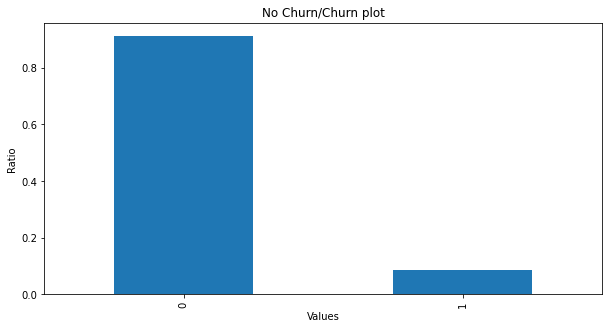

In [63]:
# Plotting no-churn and churn customers
telecomHVC.churn.value_counts(normalize=True).plot.bar(figsize=[10,5])
plt.title("No Churn/Churn plot")
plt.ylabel('Ratio')
plt.xlabel('Values')
plt.show()

In [64]:
# Checking the exact % of churned customers
100*telecomHVC.churn.sum()/len(telecomHVC)

8.635924110566503

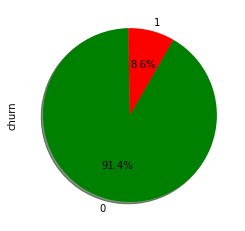

In [65]:
# Change pie chart colors here
colors = ["Green", "red", "purple", "orange"]
telecomHVC['churn'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=colors)
plt.show() 


<font color= red>Inferences</font>
<font color= blue>  

It can be observed that only about 8.6% of the customers actually churn. This indicates a very high class imbalance.  In order to proceed with further analysis, the classes need to be balanced during further analysis.<br> The class weights method will be used to address this during the model creation stage.

 </font>




In [66]:
findnull(telecomHVC)

,Total,%
count_rech_3g_6,18559,61.881898
arpu_3g_6,18559,61.881898
count_rech_2g_6,18559,61.881898
arpu_2g_6,18559,61.881898
count_rech_2g_7,18292,60.991631
arpu_2g_7,18292,60.991631
count_rech_3g_7,18292,60.991631
arpu_3g_7,18292,60.991631
arpu_3g_8,18210,60.718215
arpu_2g_8,18210,60.718215


Deriving some new features from the existing columns

In [67]:
# Calculating aon in months by dividing total days by 30 (average number of days in a month)
telecomHVC['aonMths'] = round(telecomHVC['aon']/30,0)
telecomHVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avgRechAmt6_7,churn,aonMths
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,802,57.74,19.38,18.74,1185.0,1,27.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,-1,0,0,0,1,0,0,1,3,0,0,0,0,0,0,-1,1,1,315,21.03,910.65,122.16,520.0,0,10.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655

In [68]:
#Dropping aon column
telecomHVC.drop('aon',axis=1,inplace=True)

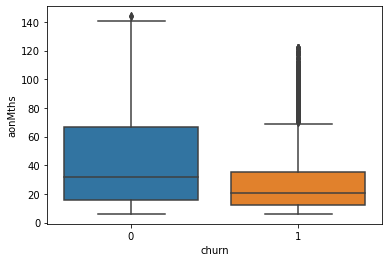

In [69]:
# Finding relation between aonMths and churn
sns.boxplot(data = telecomHVC, y = 'aonMths', x ='churn')#,showfliers=False)
plt.show()


<font color= red>Inferences</font>
<font color= blue>  

It appears that customer who have been with the network for a shorter duration are more likely to churn.
 </font>




In [70]:
findnull(telecomHVC)

,Total,%
count_rech_3g_6,18559,61.881898
arpu_3g_6,18559,61.881898
count_rech_2g_6,18559,61.881898
arpu_2g_6,18559,61.881898
count_rech_2g_7,18292,60.991631
arpu_2g_7,18292,60.991631
count_rech_3g_7,18292,60.991631
arpu_3g_7,18292,60.991631
arpu_3g_8,18210,60.718215
arpu_2g_8,18210,60.718215


In [71]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecomHVC
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn")#,showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn")#,showfliers=False),showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn")#,showfliers=False),showfliers=False)
    plt.legend(loc='best')
    plt.show()

Checking incoming mou columns

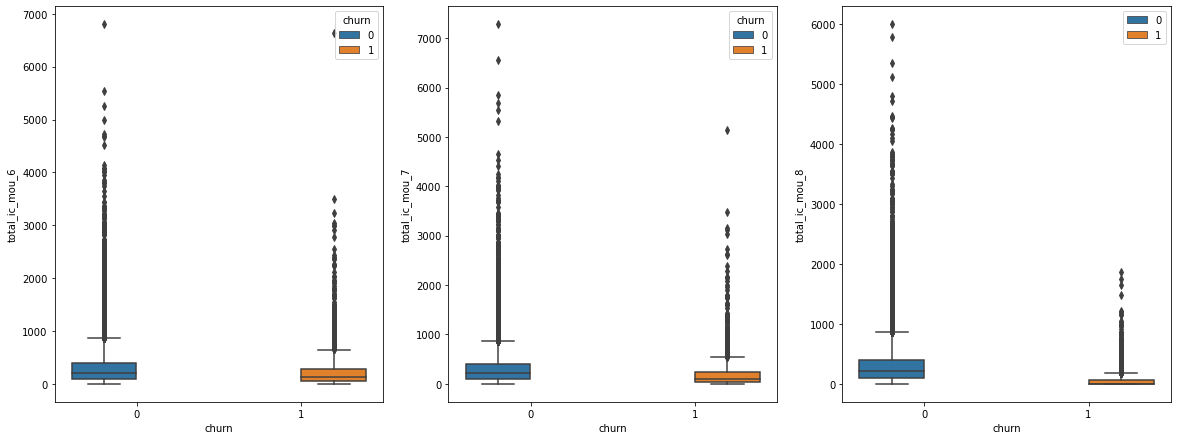

In [72]:
plot_box_chart('total_ic_mou')


<font color= red>Inferences</font>
<font color= blue>  


It appears that there is a drop in incoming minutes of usage in month 8 for churned customers.
 </font>



In [73]:
mou_ic_cols6 = list(telecomHVC.columns[telecomHVC.columns.str.contains('.*_ic_.*mou_6',regex=True)])
mou_ic_cols6

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [74]:
telecomHVC[mou_ic_cols6].head()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
7,16.23,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06
8,0.00,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00
13,23.53,67.88,142.88,4.81,215.58,115.68,308.13,0.00,423.81,968.61,0.45,245.28
16,0.00,41.33,226.81,8.71,276.86,68.79,18.68,0.51,87.99,364.86,0.00,0.00
17,0.00,34.54,47.41,0.00,81.96,8.63,1.28,0.00,9.91,91.88,0.00,0.00


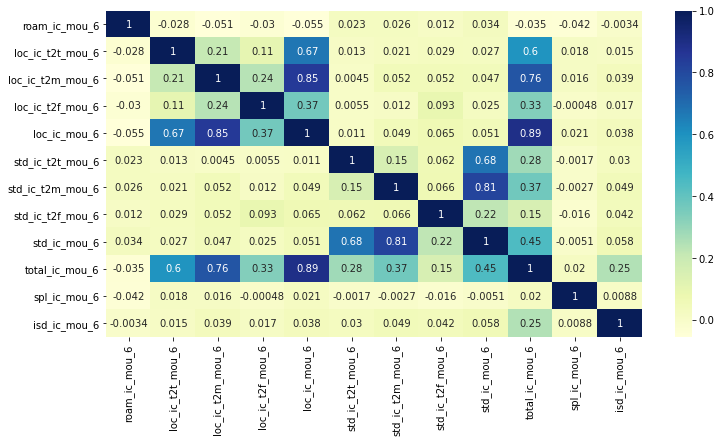

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(telecomHVC.filter(mou_ic_cols6).corr(),annot=True,cmap='YlGnBu')
plt.show()




<font color= red>Inferences</font>
<font color= blue>  
it seems that there is a strong correlations between certain variables and there is a possibility that one variable may be a sum of the others. Checking this further

 </font>


In [76]:
print(telecomHVC.loc[8,'total_ic_mou_6'],"==",telecomHVC.loc[8,['loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6']].sum())
print(telecomHVC.loc[8,'std_ic_mou_6'],"==",telecomHVC.loc[8,['std_ic_t2m_mou_6','std_ic_t2t_mou_6','std_ic_t2f_mou_6']].sum())
print(telecomHVC.loc[8,'loc_ic_mou_6'],"==",telecomHVC.loc[8,['loc_ic_t2m_mou_6','loc_ic_t2t_mou_6','loc_ic_t2f_mou_6']].sum())

103.86 == 103.86000000000001
22.43 == 22.43
81.43 == 81.42



<font color= red>Inferences</font>
<font color= blue>  
Looking at the above, it might be a good idea to drop the variables total_ic_mou_\*, std_ic_mou_\* and loc_ic_mou_\* since they appear to be combinations of other variables.
 </font>




In [77]:
telecomHVC.drop(['total_ic_mou_6', 'std_ic_mou_6','loc_ic_mou_6',
                'total_ic_mou_7', 'std_ic_mou_7','loc_ic_mou_7',
                'total_ic_mou_8', 'std_ic_mou_8','loc_ic_mou_8'],
                axis=1,inplace=True)
telecomHVC.shape

(29991, 144)

Checking outgoing mou columns

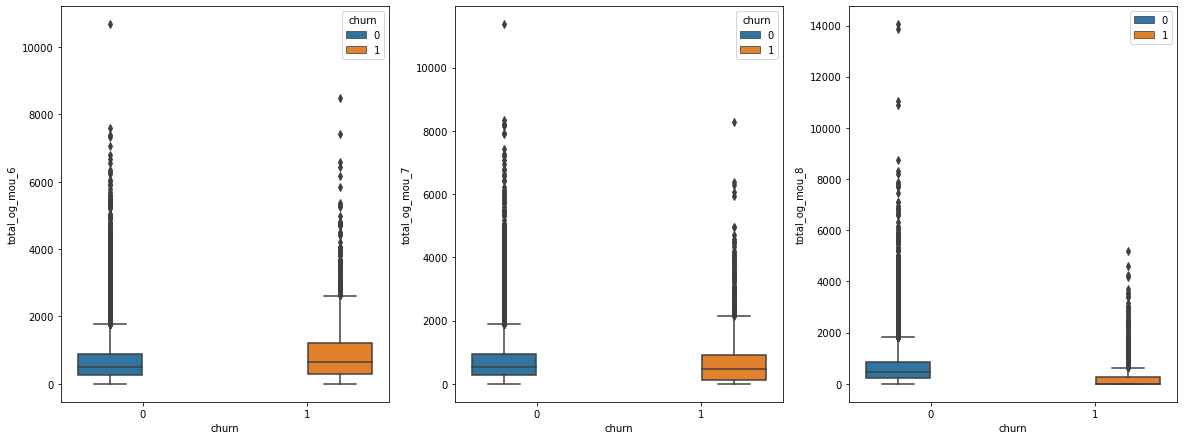

In [78]:
plot_box_chart('total_og_mou')


<font color= red>Inferences</font>
<font color= blue>  

It appears that there is a drop in outgoing minutes of usage in month 8 for churned customers.
 </font>



In [79]:
mou_og_cols6 = telecomHVC.columns[telecomHVC.columns.str.contains('.*_og_.*_6',regex=True)]
mou_og_cols6

Index(['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6'],
      dtype='object')

In [80]:
telecomHVC[mou_og_cols6].head()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
7,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.50,487.53
8,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.00,508.36
13,7.98,49.63,151.13,4.54,0.0,205.31,446.41,255.36,0.00,701.78,0.0,0.00,907.09
16,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.0,0.00,346.81
17,0.00,38.99,58.54,0.00,0.0,97.54,1146.91,1.55,0.00,1148.46,0.0,2.58,1249.53


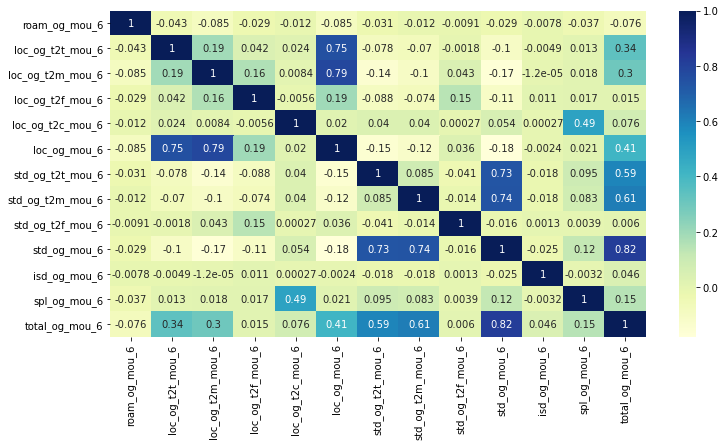

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(telecomHVC.filter(mou_og_cols6).corr(),annot=True,cmap='YlGnBu')
plt.show()

There appear to be some strong correlations between certain variables and there is a possibility that one variable may be a sum of the others. Checking this further

In [82]:
print(telecomHVC.loc[8,'total_og_mou_6'],"==",telecomHVC.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())
print(telecomHVC.loc[8,'std_og_mou_6'],"==",telecomHVC.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())
print(telecomHVC.loc[8,'loc_og_mou_6'],"==",telecomHVC.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6']].sum())

508.36 == 508.34999999999997
130.26 == 130.25
378.09 == 378.09



<font color= red>Inferences</font>
<font color= blue>  
Looking at the above, it might be a good idea to drop the variables total_og_mou_\*, std_og_mou_\* and loc_og_mou_\* since they appear to be combinations of other variables.
 </font>



In [83]:
telecomHVC.drop(['total_og_mou_6', 'std_og_mou_6','loc_og_mou_6',
                'total_og_mou_7', 'std_og_mou_7','loc_og_mou_7',
                'total_og_mou_8', 'std_og_mou_8','loc_og_mou_8'],
                axis=1,inplace=True)
telecomHVC.shape

(29991, 135)

Looking at recharge

In [84]:
rech = list(telecomHVC.filter(regex='rech').columns)
rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [85]:
telecomHVC[rech].head(20)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
7,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,19,21,14,437,601,120,90,154,30,0.0,2.0,3.0,0.0,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,0.0,177.0,69.0
13,6,4,11,507,253,717,110,110,130,0.0,0.0,3.0,0.0,0.0,23.0,NaN,NaN,3.0,NaN,NaN,0.0,0.0,0.0,69.0
16,10,6,2,570,348,160,110,110,130,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
17,19,2,4,816,0,30,110,0,30,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
21,22,26,27,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
24,5,5,7,440,330,490,110,110,130,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
33,7,14,1,1058,2806,455,252,1255,455,5.0,8.0,1.0,252.0,1255.0,455.0,0.0,0.0,0.0,5.0,8.0,1.0,1057.0,2553.0,455.0
38,27,22,6,420,636,416,30,110,130,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
41,4,4,3,496,510,410,150,150,150,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [86]:
findnull(telecomHVC[rech])

,Total,%
count_rech_3g_6,18559,61.881898
count_rech_2g_6,18559,61.881898
count_rech_3g_7,18292,60.991631
count_rech_2g_7,18292,60.991631
count_rech_3g_8,18210,60.718215
count_rech_2g_8,18210,60.718215
av_rech_amt_data_8,0,0.000000
max_rech_amt_8,0,0.000000
total_rech_num_7,0,0.000000
total_rech_num_8,0,0.000000


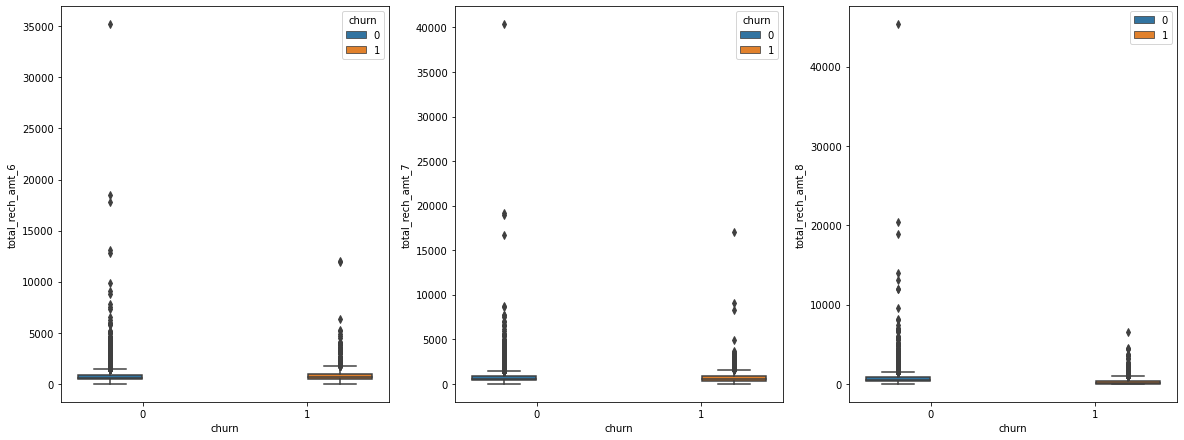

In [87]:
plot_box_chart('total_rech_amt')


<font color= red>Inferences</font>
<font color= blue>  

There appears to be a drop in total recharge amount in month 8 for churned customers.
 </font>


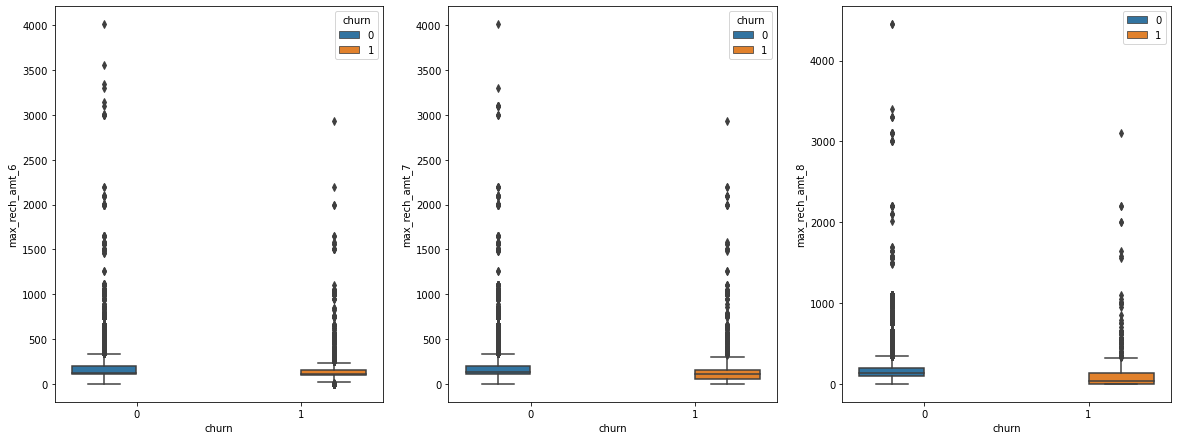

In [88]:
plot_box_chart('max_rech_amt')

There appears to be a progressive drop in max recharge amount from months 6 to 7 to 8 for churned customers.

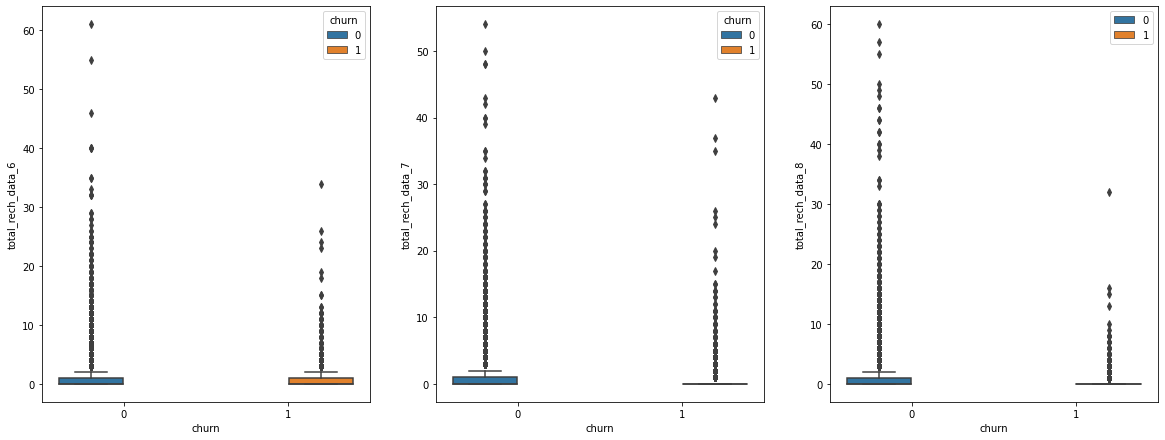

In [89]:
plot_box_chart('total_rech_data')

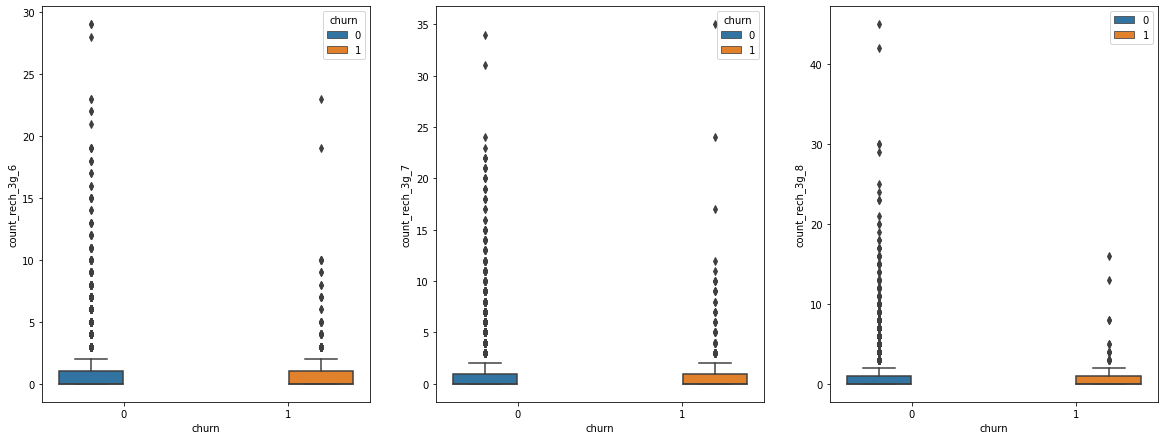

In [90]:
plot_box_chart('count_rech_3g')

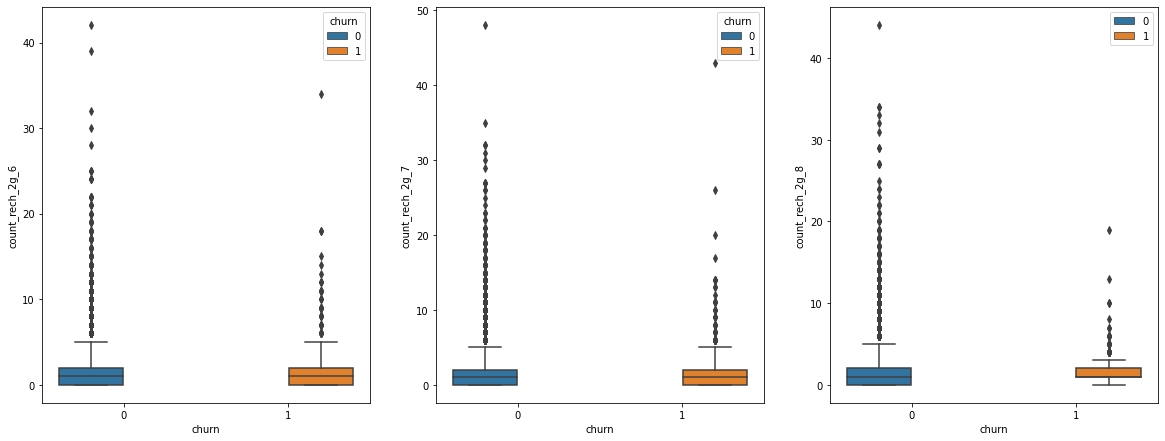

In [91]:
plot_box_chart('count_rech_2g')


<font color= red>Inferences</font>
<font color= blue>  

There is no significant information gain from plotting count recharge for both 2g and 3g.
 </font>



In [92]:
print(telecomHVC.loc[33,'total_rech_data_6'],"==",telecomHVC.loc[33,['count_rech_3g_6','count_rech_2g_6']].sum())
print(telecomHVC.loc[53,'total_rech_data_6'],"==",telecomHVC.loc[53,['count_rech_3g_6','count_rech_2g_6']].sum())

5.0 == 5.0
4.0 == 4.0



<font color= red>Inferences</font>
<font color= blue>  

In case of data recharge, there doesn't seem to be much of a difference in the median over the months for churned customers. Additionally, the individual recharge count columns appear to have a large number of nulls.<br>Hence, will drop the individual count for 2G and 3G data and use the total recharge number columns.
 </font>




In [93]:
telecomHVC.drop(['count_rech_2g_6', 'count_rech_3g_6','count_rech_2g_7',
                'count_rech_3g_7', 'count_rech_2g_8','count_rech_3g_8'],
                axis=1,inplace=True)
telecomHVC.shape

(29991, 129)

**Looking at Average Revenue per customer**


In [94]:
arpuCols = list(telecomHVC.filter(regex='arpu').columns)
arpuCols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

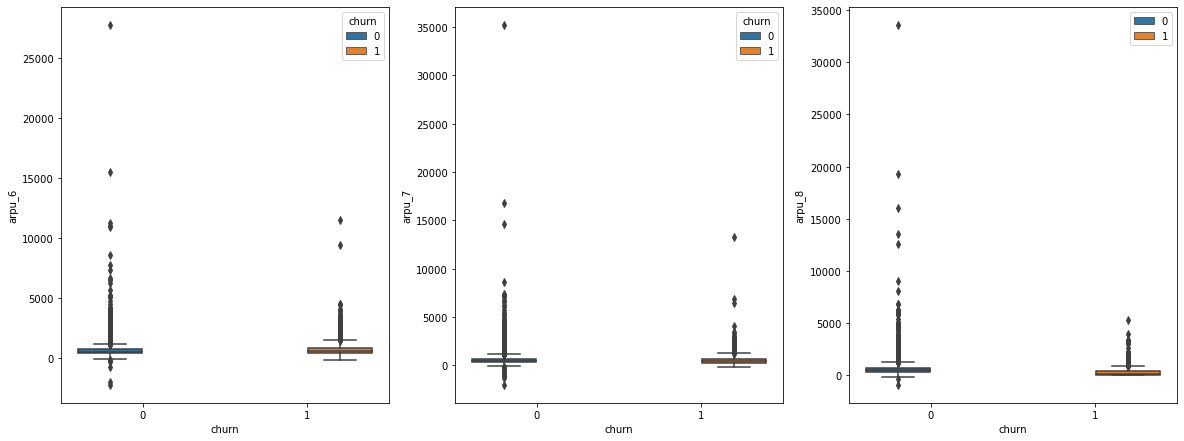

In [95]:
plot_box_chart('arpu')

As can be observed, arpu for churned customer is much lower for month 8 indicating that revenue from these customers has reduced in the 7th month.

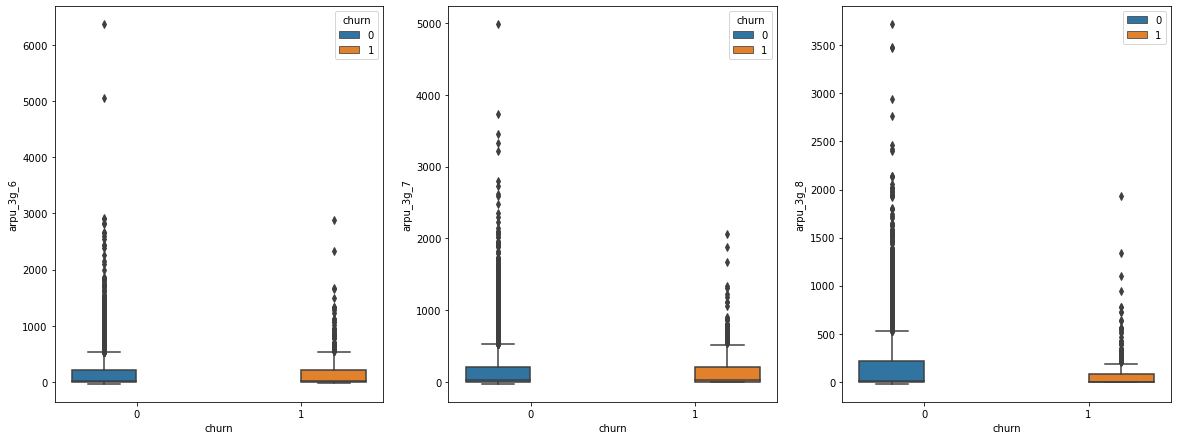

In [96]:
plot_box_chart('arpu_3g')

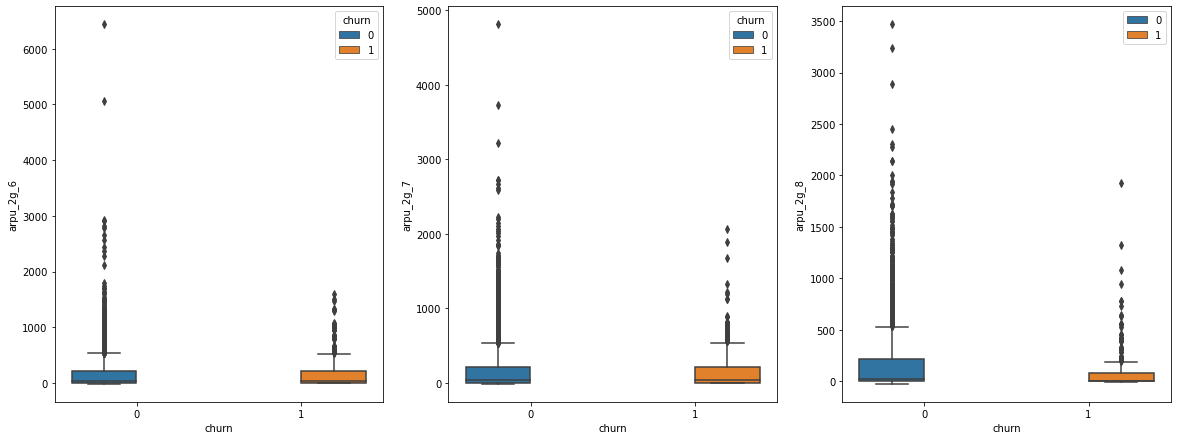

In [97]:
plot_box_chart('arpu_2g')


<font color= red>Inferences</font>
<font color= blue>  
As seen above, a similar pattern as arpu is observed for 2g and 3g arpu as well - there is a drop in arpu data for 8th month.
 </font>




Looking at Volume based cost(vbc)


In [98]:
vbcCols = list(telecomHVC.filter(regex='vbc').columns)
vbcCols

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [99]:
# Renaming the vbc columns in the same format as the remaining columns i.e. to 6,7,8 instead of month names
telecomHVC.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'},inplace=True)
vbcCols = list(telecomHVC.filter(regex='vbc').columns)
vbcCols

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [100]:
findnull(telecomHVC).head(8)

,Total,%
arpu_2g_6,18559,61.881898
arpu_3g_6,18559,61.881898
arpu_3g_7,18292,60.991631
arpu_2g_7,18292,60.991631
arpu_3g_8,18210,60.718215
arpu_2g_8,18210,60.718215
spl_og_mou_7,0,0.000000
spl_og_mou_6,0,0.000000


In [101]:
# Dropping columns with more than 50% missing data
telecomHVC.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [102]:
findnull(telecomHVC).head()

,Total,%
aonMths,0,0.0
std_og_t2m_mou_6,0,0.0
std_og_t2m_mou_8,0,0.0
std_og_t2f_mou_6,0,0.0
std_og_t2f_mou_7,0,0.0


In [103]:
telecomHVC.shape

(29991, 123)

In [104]:
telecomHVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgRechAmt6_7,churn,aonMths
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,57.74,19.38,18.74,1185.0,1,27.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1,0,0,0,1,0,0,1,3,0,0,0,0,0,0,-1,1,1,21.03,910.65,122.16,520.0,0,10.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,-1,-1,0,0,0,0,0,0,3,0,0,0,0,0,0,-1,-1,1,0.00,0.00,0.00,380.0,0,87.0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,1

**Calculate difference between 8th and previous months**

Since months 6 and 7 are the good phase months and 8th is the actiona month, it might be a good idea to find difference between the 8th month and the previous months. This has also been observed in some of the plots above.

The difference can be in patterns such as usage difference or recharge value difference.

In [105]:
telecomHVC['arpu_diff'] = telecomHVC.arpu_8 - ((telecomHVC.arpu_6 + telecomHVC.arpu_7)/2)

telecomHVC['onnet_mou_diff'] = telecomHVC.onnet_mou_8 - ((telecomHVC.onnet_mou_6 + telecomHVC.onnet_mou_7)/2)

telecomHVC['offnet_mou_diff'] = telecomHVC.offnet_mou_8 - ((telecomHVC.offnet_mou_6 + telecomHVC.offnet_mou_7)/2)

telecomHVC['roam_ic_mou_diff'] = telecomHVC.roam_ic_mou_8 - ((telecomHVC.roam_ic_mou_6 + telecomHVC.roam_ic_mou_7)/2)

telecomHVC['roam_og_mou_diff'] = telecomHVC.roam_og_mou_8 - ((telecomHVC.roam_og_mou_6 + telecomHVC.roam_og_mou_7)/2)

telecomHVC['isd_og_mou_diff'] = telecomHVC.isd_og_mou_8 - ((telecomHVC.isd_og_mou_6 + telecomHVC.isd_og_mou_7)/2)

telecomHVC['spl_og_mou_diff'] = telecomHVC.spl_og_mou_8 - ((telecomHVC.spl_og_mou_6 + telecomHVC.spl_og_mou_7)/2)

telecomHVC['isd_ic_mou_diff'] = telecomHVC.isd_ic_mou_8 - ((telecomHVC.isd_ic_mou_6 + telecomHVC.isd_ic_mou_7)/2)

telecomHVC['spl_ic_mou_diff'] = telecomHVC.spl_ic_mou_8 - ((telecomHVC.spl_ic_mou_6 + telecomHVC.spl_ic_mou_7)/2)

telecomHVC['total_rech_num_diff'] = telecomHVC.total_rech_num_8 - ((telecomHVC.total_rech_num_6 + telecomHVC.total_rech_num_7)/2)

telecomHVC['total_rech_amt_diff'] = telecomHVC.total_rech_amt_8 - ((telecomHVC.total_rech_amt_6 + telecomHVC.total_rech_amt_7)/2)

telecomHVC['max_rech_amt_diff'] = telecomHVC.max_rech_amt_8 - ((telecomHVC.max_rech_amt_6 + telecomHVC.max_rech_amt_7)/2)

telecomHVC['total_rech_data_diff'] = telecomHVC.total_rech_data_8 - ((telecomHVC.total_rech_data_6 + telecomHVC.total_rech_data_7)/2)

telecomHVC['max_rech_data_diff'] = telecomHVC.max_rech_data_8 - ((telecomHVC.max_rech_data_6 + telecomHVC.max_rech_data_7)/2)

telecomHVC['av_rech_amt_data_diff'] = telecomHVC.av_rech_amt_data_8 - ((telecomHVC.av_rech_amt_data_6 + telecomHVC.av_rech_amt_data_7)/2)

telecomHVC['vol_2g_mb_diff'] = telecomHVC.vol_2g_mb_8 - ((telecomHVC.vol_2g_mb_6 + telecomHVC.vol_2g_mb_7)/2)

telecomHVC['vol_3g_mb_diff'] = telecomHVC.vol_3g_mb_8 - ((telecomHVC.vol_3g_mb_6 + telecomHVC.vol_3g_mb_7)/2)

In [106]:
diffCols = list(telecomHVC.filter(regex='diff').columns)
diffCols

['arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'isd_og_mou_diff',
 'spl_og_mou_diff',
 'isd_ic_mou_diff',
 'spl_ic_mou_diff',
 'total_rech_num_diff',
 'total_rech_amt_diff',
 'max_rech_amt_diff',
 'total_rech_data_diff',
 'max_rech_data_diff',
 'av_rech_amt_data_diff',
 'vol_2g_mb_diff',
 'vol_3g_mb_diff']

In [107]:
telecomHVC[diffCols].describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000
mean,-53.471439,-29.822133,-41.799351,-2.081183,-4.028250,-0.190761,0.326624,0.117988,-0.013966,-1.797573,-83.095229,-10.648094,0.036478,-2.538578,-4.456862,-9.371030,1.272853
std,341.201774,320.913235,356.763277,67.163215,96.294389,14.293379,19.966665,53.421593,0.179174,6.950343,424.996298,137.325182,1.798142,71.627462,135.335759,218.523512,575.054601
min,-5811.052500,-5295.315000,-7094.390000,-1510.645000,-2410.835000,-618.858753,-1081.910000,-1637.305000,-16.280000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,-195.615750,-71.250000,-122.597500,0.000000,-0.505334,0.000000,-2.575000,0.000000,0.000000,-4.500000,-273.000000,-33.000000,0.000000,0.000000,-8.500000,-0.582500,0.000000
50%,-46.267500,-8.045000,-20.745000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,-71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,90.027250,31.855000,58.010000,0.000000,0.000000,0.000000,1.885000,0.000000,0.000000,1.000000,105.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12808.617000,6359.920000,12604.240000,2277.980000,3057.150000,544.780000,1112.655000,3693.370000,4.450000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


As expected, there appears to be quite a large difference in the numeric variables for the 8th month as compared to the average of 6 and 7th month 

In [108]:
numCols = list(telecomHVC.describe().columns)
numCols.remove('churn')
print(numCols)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_m

#### Dummy Variable creation

In [109]:
catCols = list(telecomHVC.select_dtypes('object').columns)
print(catCols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [110]:
dummy = pd.get_dummies(telecomHVC[catCols],drop_first=True)
dummy.columns

Index(['night_pck_user_6_0.0', 'night_pck_user_6_1.0', 'night_pck_user_7_0.0',
       'night_pck_user_7_1.0', 'night_pck_user_8_0.0', 'night_pck_user_8_1.0',
       'fb_user_6_0.0', 'fb_user_6_1.0', 'fb_user_7_0.0', 'fb_user_7_1.0',
       'fb_user_8_0.0', 'fb_user_8_1.0'],
      dtype='object')

In [111]:
# Adding the results to the master dataframe
telecomHVC = pd.concat([telecomHVC, dummy], axis=1)

In [112]:
# Dropping the repeated variables
# We have created dummies for the below variables, so we can drop them
telecomHVC = telecomHVC.drop(catCols, 1)

In [113]:
telecomHVC.shape

(29991, 146)

In [114]:
telecomHVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgRechAmt6_7,churn,aonMths,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1185.0,1,27.0,1961.9650,-3.970,-184.385,6.780,19.895,9.92,4.25,23.295,-0.105,2.0,2453.0,395.0,0.0,0.0,0.0,0.00,0.000,0,0,0,0,0,0,0,0,0,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,520.0,0,10.0,-298.1100,-347.280,48.835,0.000,0.000,0.00,10.23,0.000,0.000,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.97,-363.535,0,0,1,0,1,0,0,0,0,1,0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00

In [115]:
findnull(telecomHVC).head()

,Total,%
fb_user_8_1.0,0,0.0
isd_og_mou_6,0,0.0
loc_ic_t2f_mou_7,0,0.0
loc_ic_t2f_mou_6,0,0.0
loc_ic_t2m_mou_8,0,0.0


#### Outlier Treatment

In [116]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
telecomHVC[numCols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgRechAmt6_7,aonMths,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.00000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000
mean,587.508744,589.307962,534.936914,297.408342,305.618891,271.691483,420.008243,425.856471,381.133006,17.524747,13.602946,13.482664,29.482918,22.141948,21.784183,95.168422,96.194454,88.56661,182.204857,182.142928,170.438291,7.010732,7.133837,6.605788,1.583804,1.878620,

In [117]:
cap = 0.90
for cols in numCols:
    upperLimit = telecomHVC[cols].quantile(cap)
    telecomHVC[cols] = telecomHVC[cols].apply(lambda x: upperLimit if x>upperLimit else x)

telecomHVC[numCols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgRechAmt6_7,aonMths,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.0,29991.0,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.0,29991.0,29991.000000,29991.000000,29991.00000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.0,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.0,29991.0,29991.0,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000,29991.000000
mean,542.200509,542.650180,486.893027,238.406350,244.259214,208.117517,361.323307,366.306172,322.814989,4.799170,2.524611,2.763573,9.534911,5.700014,5.312473,61.332884,61.724093,57.429328,151.390090,153.209117,141.783650,3.905940,4.013544,3.676122,0.628274,0.768924,0.728659,135.576114,143.798473,115.930187,145

In [118]:
telecomHVC.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgRechAmt6_7,churn,aonMths,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
7,994.201,995.901,985.424,57.84,54.68,52.29,453.43,567.16,325.91,16.23,18.36,18.63,23.74,12.59,37.03,51.39,31.38,40.28,308.63,437.88,162.28,18.34,18.66,16.94,0.00,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,2.21,2.18,1.73,0.0,0.0,0.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,39.23,41.03,37.16,34.71,11.83,30.39,73.38,75.04,68.56,4.36,4.58,3.96,0.21,0.0,0.0,2.06,14.53,15.30,1.16,1.59,1.23,5.0,5.0,7.0,1181.0,790.0,1155.0,297.0,300.0,252.0,0.0,0.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1119.0,1,27.0,256.9815,-3.970,-184.385,6.780000,11.965,0.0,4.25,5.49,-0.105,2.0,319.0,66.0,0.0,0.0,0.0,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,207.93,207.86,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,4.45,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,195.82,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,455.70,122.16,520.0,0,10.0,-298.1100,-347.280,48.835,0.000000,0.000,0.0,9.58,0.00,0.000,-6.0,-399.0,-92.0,1.0,-54.0,-19.5,-177.970,-363.535,0,0,1,0,1,0,0,0,0,1,0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,18.36,18.63,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,16.94,0.00,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.01,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,14

## Step 6: Train-Test split

In [119]:
# divide data into train and test
X = telecomHVC.drop("churn", axis = 1)
y = telecomHVC.churn
np.random.seed(0) 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3,random_state=100)

In [120]:
print("Shape of X_train is ",X_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of X_test is ",X_test.shape)
print("Shape of y_test is ",y_test.shape)

Shape of X_train is  (20993, 145)
Shape of y_train is  (20993,)
Shape of X_test is  (8998, 145)
Shape of y_test is  (8998,)


In [121]:
y_train.head()

12271    0
77283    0
92584    0
16605    0
64173    0
Name: churn, dtype: int64

## Step 7: Feature Scaling

In [122]:
numCols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 

In [123]:
#Rescaling the features using Standard Scaling
scaler = StandardScaler()
X_train[numCols] = scaler.fit_transform(X_train[numCols])

In [124]:
y_train.value_counts(normalize=True)

0    0.915591
1    0.084409
Name: churn, dtype: float64

In [125]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,avgRechAmt6_7,aonMths,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
12271,-0.417618,-0.342594,-0.798078,-0.856872,-0.742518,-0.787979,-0.623256,-0.226036,-0.908687,-0.451713,-0.430678,-0.460574,-0.453262,-0.429730,-0.449949,-0.707157,-0.495354,-0.714791,0.220434,0.855356,-0.469650,0.000508,2.373383,-0.012825,-0.473424,-0.478227,-0.500318,-0.617366,-0.577571,-0.550878,-0.718524,-0.712126,-0.697181,0.195969,2.716722,-0.435761,0.0,0.0,-0.334541,-0.178776,-0.083784,-0.465543,2.479829,0.0,0.0,0.119880,2.138931,2.119940,2.006104,0.952227,0.519032,-0.648911,0.526242,2.302745,-0.658647,-0.667899,-0.661115,-0.778996,-0.789134,-0.781030,0.992211,-0.020775,-0.514510,-0.498185,0.0,-0.351562,-0.440119,-0.450304,-0.468228,-0.496723,1.674455,2.427317,1.123438,0.815182,-0.511944,-0.492986,-0.338164,-0.741617,0.113698,0.078060,0.240095,-1.213788,-0.782614,-0.660858,0.314656,0.269134,0.272518,1.424363,1.394493,1.460114,0.844649,0.738384,0.902879,-0.400562,0.572737,0.664651,0.992668,0.777473,0.775708,2.823361,2.761322,2.933153,-0.464984,-0.449786,-0.478470,-0.368428,-0.372419,-0.363154,0.0,0.0,0.0,1.321736,2.215402,0.464171,-0.538636,-1.068395,-0.390591,0.225432,-0.328519,0.188442,0.223247,0.076462,-0.027103,0.12642,0.241056,-1.497385,-0.293152,0.187578,0.155198,0.211585,0.185240,0.368690,0.093112,1,0,1,0,1,0,0,1,0,1,0,1
77283,0.996375,-0.134408,-1.009993,2.165293,1.129730,-0.867726,-0.545264,-0.473395,-1.216222,-0.451713,-0.430678,-0.460574,-0.453262,-0.429730,-0.449949,-0.300058,-0.260015,-0.820195,-0.409972,-0.462755,-1.043406,-0.364758,-0.576615,-0.651445,-0.473424,-0.478227,-0.500318,2.339356,1.594566,-0.614066,-0.217400,-0.182899,-0.697181,2.729881,2.716722,-0.435761,0.0,0.0,-0.334541,-0.664236,-0.701086,-0.711842,-0.494314,0.0,0.0,-0.802141,-0.797656,-0.767005,-0.869524,-0.790457,-1.134467,-0.695706,0.918602,-0.705926,-0.602022,-0.560708,-0.38

In [126]:
X_train.shape

(20993, 145)

In [127]:
y_train.head()

12271    0
77283    0
92584    0
16605    0
64173    0
Name: churn, dtype: int64

In [128]:
y_test.head()

83339    0
68510    0
92632    0
78687    0
93703    0
Name: churn, dtype: int64

## Step 8: Model Building

For this exercise, due to the sheer number of variables, PCA will be used for dimension reduction to ensure least information loss and high sensitivity.

Performing PCA on the scaled data

In [129]:
# from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [130]:
pca.components_

array([[ 4.59500648e-02,  5.26830902e-02,  7.31888573e-02, ...,
         8.82692420e-02, -6.29462556e-03,  8.52211064e-02],
       [ 8.78281164e-02,  1.10236351e-01,  1.42565326e-01, ...,
        -5.25864282e-02,  6.71711982e-03, -3.72266612e-02],
       [ 1.55249494e-01,  2.16885106e-01,  2.07648663e-01, ...,
         2.70421625e-02,  1.04299205e-02,  3.40150686e-02],
       ...,
       [-0.00000000e+00, -1.17144619e-16,  1.71511637e-16, ...,
        -2.60033506e-01,  6.34019716e-02,  6.34019716e-02],
       [ 0.00000000e+00, -9.91162398e-17,  9.48317506e-18, ...,
        -3.59753154e-01,  1.39444978e-02,  1.39444978e-02],
       [ 0.00000000e+00,  1.07315084e-16, -3.24475883e-16, ...,
         1.70170553e-03,  2.66673310e-02,  2.66673310e-02]])

In [131]:
pca.explained_variance_ratio_

array([1.25531655e-01, 8.04105245e-02, 6.30027217e-02, 4.74587737e-02,
       4.47438247e-02, 3.69154381e-02, 3.11291106e-02, 2.84542182e-02,
       2.48412965e-02, 2.15487474e-02, 2.05928418e-02, 1.95038578e-02,
       1.87134558e-02, 1.70776835e-02, 1.60434223e-02, 1.54334916e-02,
       1.48704006e-02, 1.46593390e-02, 1.32425686e-02, 1.20420358e-02,
       1.11744499e-02, 1.04267862e-02, 1.01745300e-02, 9.60590086e-03,
       8.91079941e-03, 8.64743576e-03, 8.38779045e-03, 8.29459589e-03,
       8.00684965e-03, 7.70879195e-03, 7.51242328e-03, 7.43643069e-03,
       7.22369047e-03, 6.89872950e-03, 6.83899528e-03, 6.64863091e-03,
       6.44870977e-03, 6.42298310e-03, 5.92841586e-03, 5.77072955e-03,
       5.48112830e-03, 5.37386470e-03, 5.13928556e-03, 4.93492508e-03,
       4.81515914e-03, 4.77956702e-03, 4.67800910e-03, 4.42246771e-03,
       4.40163274e-03, 4.33075169e-03, 4.05750228e-03, 4.00030414e-03,
       3.86941602e-03, 3.80122838e-03, 3.75536717e-03, 3.69014415e-03,
      

Making a scree plot for the explained variance

In [132]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.12553165, 0.20594218, 0.2689449 , 0.31640367, 0.3611475 ,
       0.39806294, 0.42919205, 0.45764627, 0.48248756, 0.50403631,
       0.52462915, 0.54413301, 0.56284647, 0.57992415, 0.59596757,
       0.61140106, 0.62627146, 0.6409308 , 0.65417337, 0.66621541,
       0.67738986, 0.68781664, 0.69799117, 0.70759707, 0.71650787,
       0.72515531, 0.7335431 , 0.7418377 , 0.74984455, 0.75755334,
       0.76506576, 0.77250219, 0.77972588, 0.78662461, 0.79346361,
       0.80011224, 0.80656095, 0.81298393, 0.81891235, 0.82468308,
       0.8301642 , 0.83553807, 0.84067735, 0.84561228, 0.85042744,
       0.85520701, 0.85988501, 0.86430748, 0.86870911, 0.87303987,
       0.87709737, 0.88109767, 0.88496709, 0.88876832, 0.89252368,
       0.89621383, 0.89988568, 0.903413  , 0.90687914, 0.91027888,
       0.91357234, 0.91675663, 0.91968774, 0.92250545, 0.92528504,
       0.92800265, 0.93068566, 0.93334847, 0.93593894, 0.93842611,
       0.94084866, 0.94319771, 0.94551002, 0.94776138, 0.94993

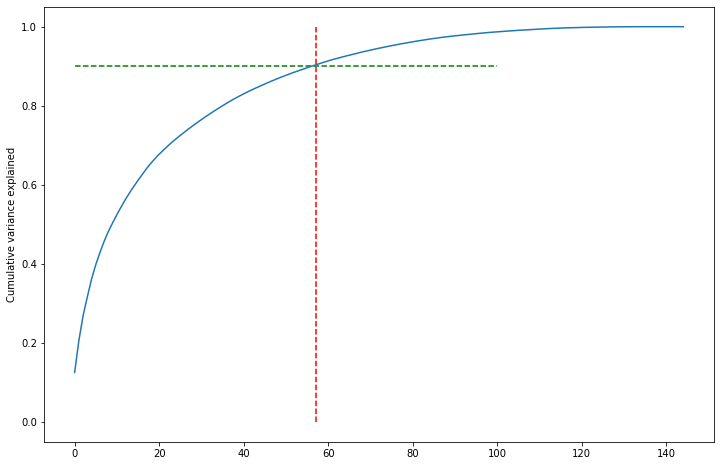

In [133]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=57, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

90% variance in data is explained by ~57 components

In [134]:
# from sklearn.decomposition import IncrementalPCA
pca_2 = IncrementalPCA(n_components=57)
df_train_pca = pca_2.fit_transform(X_train)

In [135]:
df_train_pca.shape

(20993, 57)

In [136]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(57, 57)

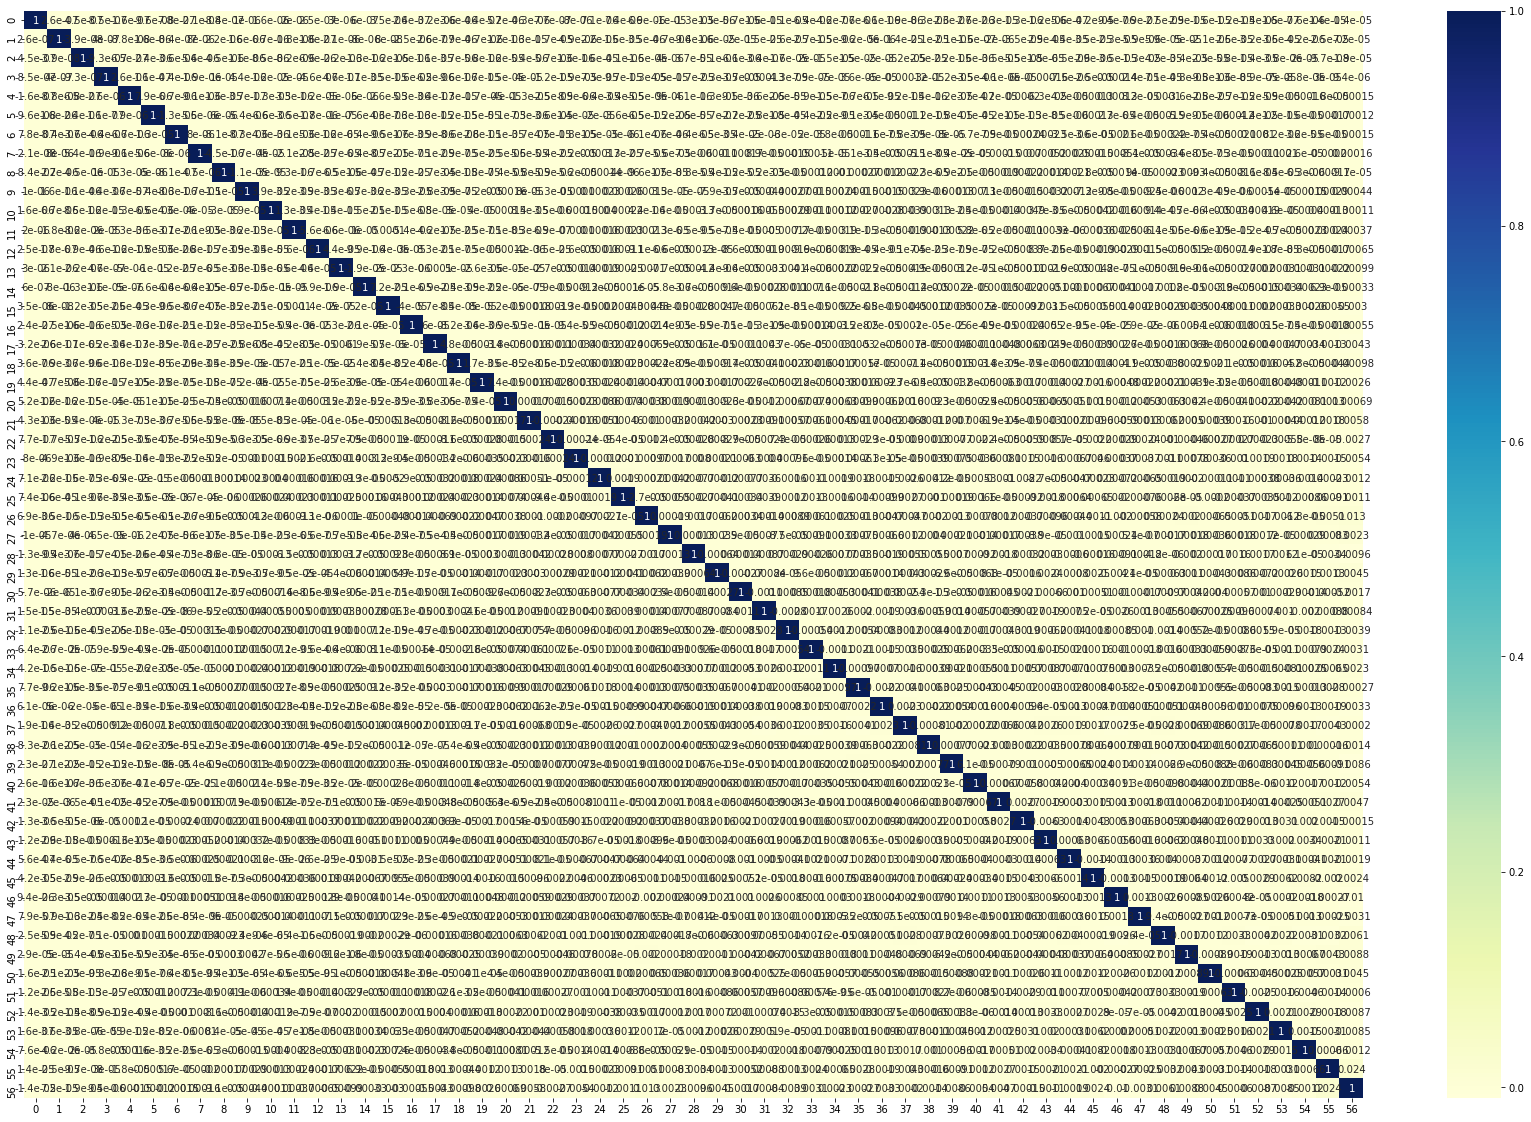

In [137]:
plt.figure(figsize = [30, 20])
ax = sns.heatmap(corrmat , annot = True, cmap='YlGnBu')
bottom , top  = ax.get_ylim()
ax.set_ylim = (bottom + 0.5 , top - 0.5)
plt.show()

In [138]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.024239289137235866 , min corr:  -0.010057617657109897


In [139]:
#Applying PCA on test data 

X_test[numCols]=scaler.transform(X_test[numCols])
df_test_pca = pca_2.transform(X_test)
df_test_pca.shape

(8998, 57)

## Building a Logistic Regression Model

In [140]:
# from sklearn.linear_model import LogisticRegression

In [141]:
learner_pca = LogisticRegression(class_weight = 'balanced')
modelPcaLg = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [142]:
pred_probs_train = modelPcaLg.predict_proba(df_train_pca)
y_pred_df = pd.DataFrame(pred_probs_train )
y_pred_1  = y_pred_df.iloc[:, [1]]
y_tr =y_train.copy()
y_tr=y_tr.reset_index(name='churn')
y_pred_final=pd.concat([y_tr, y_pred_1], axis=1).set_index('index')
y_pred_final.columns =['churn','churn_prob']
y_pred_final.head(20)

,churn,churn_prob
index,,
12271,0,0.195764
77283,0,0.404882
92584,0,0.052076
16605,0,0.009624
64173,0,0.386945
33541,0,0.706677
25417,1,0.827247
95528,0,0.047678
72269,0,0.059656


In [143]:
# Creating function to determine various metrics

def func_metrics(Confusion):
    list1 = ['accuracy','sensitivity/Recall','specificity','FPR','FNR','Precision','NPV']

    TP = Confusion[1,1] # true positive 
    TN = Confusion[0,0] # true negatives
    FP = Confusion[0,1] # false positives
    FN = Confusion[1,0] # false negatives

    total1=sum(sum(Confusion))
    accuracy = (TN+TP)/total1

    speci = TN/(TN+FP)#'specificity/True Negative Rate(TNR)'
    sensi = TP/(FN+TP)#'sensitivity/True Positive Rate(TPR)/Recall/HitRate'
    FPR = FP/(TN+FP)#'False Positive Rate(FPR)'
    FNR = FN/(FN+TP)#'False Negative Rate(FNR)'
    PPV = TP /(TP+FP)#'Positive Predictive Value(PPV)/Precision'
    NPV = TN /(TN+ FN)#'Negative Predictive Value(NPV)'

    list2 = [accuracy,sensi,speci,FPR,FNR,PPV,NPV]
    metricsDict = zip(list1,list2)
    metrics_df = pd.DataFrame(metricsDict,columns=['Metric','Value'])
    return metrics_df

In [144]:
# ROC Curve
# from sklearn.metrics import roc_curve ,  auc
fpr , tpr, thresholds = roc_curve(y_pred_final.churn, y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print("ROC_AUC SCORE : {:2.2}".format(roc_auc))

ROC_AUC SCORE : 0.91


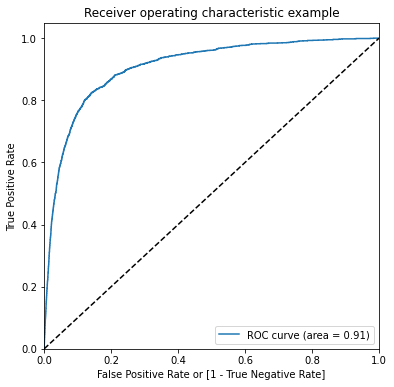

(array([0.        , 0.        , 0.        , ..., 0.99989595, 0.99994797,
        1.        ]),
 array([0.00000000e+00, 5.64334086e-04, 1.12866817e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99960427e+00, 9.99604268e-01, 9.99375488e-01, ...,
        5.59472891e-04, 5.45158685e-04, 4.29106046e-04]))

In [145]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [146]:
numbers = [float(x)/ 10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.churn_prob.map(lambda x : 1 if x > i else 0 )
y_pred_final.head() 

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
index,,,,,,,,,,,,
12271,0,0.195764,1,1,0,0,0,0,0,0,0,0
77283,0,0.404882,1,1,1,1,1,0,0,0,0,0
92584,0,0.052076,1,0,0,0,0,0,0,0,0,0
16605,0,0.009624,1,0,0,0,0,0,0,0,0,0
64173,0,0.386945,1,1,1,1,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084409  0.000000  1.000000
0.1   0.1  0.441338  0.391863  0.977991
0.2   0.2  0.622446  0.592477  0.947517
0.3   0.3  0.728147  0.710837  0.915914
0.4   0.4  0.798933  0.791842  0.875847
0.5   0.5  0.845044  0.846158  0.832957
0.6   0.6  0.876530  0.884813  0.786682
0.7   0.7  0.900348  0.917226  0.717269
0.8   0.8  0.918687  0.946465  0.617381
0.9   0.9  0.929310  0.976120  0.421558


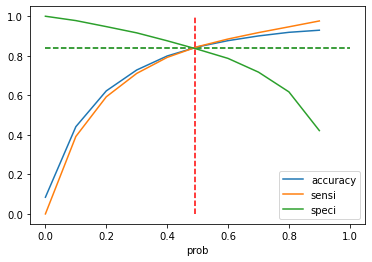

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.49, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.84, xmax=1, xmin=0, colors="g", linestyles="--")
plt.show()

In [149]:
#Metrics on Training data after obtaining probability cut off 
print("Train data metrics")
pred_probs_train = modelPcaLg.predict_proba(df_train_pca)
y_pred_df = pd.DataFrame(pred_probs_train )
y_pred_1  = y_pred_df.iloc[:, [1]]
y_tr =y_train.copy()
y_tr=y_tr.reset_index(name='churn')
y_pred_final=pd.concat([y_tr, y_pred_1], axis=1).set_index('index')
y_pred_final.columns =['churn','churn_prob']
y_pred_final.head()

# Creating new column 'pred_churn' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.pred_churn)
roc_auc = auc(fpr, tpr)
print("ROC_AUC score:  = {:2.2}".format(roc_auc))

# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
print(confusion)
print("\n")
print(func_metrics(confusion))
print("\n")
print("\n")

#Calculating metrics on test Data after obtaining probability cutoff
print("Test data metrics")
pred_probs_test = modelPcaLg.predict_proba(df_test_pca)
y_pred_df = pd.DataFrame(pred_probs_test )
y_pred_1  = y_pred_df.iloc[:, [1]]
y_te =y_test.copy()
y_te=y_te.reset_index(name='churn')
y_pred_final=pd.concat([y_te, y_pred_1], axis=1).set_index('index')
y_pred_final.columns =['churn','churn_prob']
y_pred_final.head()

# Creating new column 'pred_churn' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.pred_churn)
roc_auc = auc(fpr, tpr)
print("ROC_AUC score:  = {:2.2}".format(roc_auc))

# Confusion matrix 
confusionLg = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
print(confusionLg)
print("\n")
print(func_metrics(confusionLg))

Train data metrics
ROC_AUC score:  = 0.84
[[16176  3045]
 [  290  1482]]


               Metric     Value
0            accuracy  0.841138
1  sensitivity/Recall  0.836343
2         specificity  0.841580
3                 FPR  0.158420
4                 FNR  0.163657
5           Precision  0.327369
6                 NPV  0.982388




Test data metrics
ROC_AUC score:  = 0.84
[[6907 1273]
 [ 141  677]]


               Metric     Value
0            accuracy  0.842854
1  sensitivity/Recall  0.827628
2         specificity  0.844377
3                 FPR  0.155623
4                 FNR  0.172372
5           Precision  0.347179
6                 NPV  0.979994


The metrics appear to indicate a well fitted model.

Final Logistic Regression Metrics
ROC_AUC score:  = 0.84


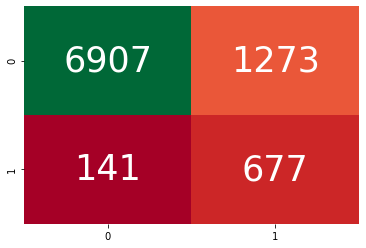

,Metric,Value
0,accuracy,0.842854
1,sensitivity/Recall,0.827628
2,specificity,0.844377
3,FPR,0.155623
4,FNR,0.172372
5,Precision,0.347179
6,NPV,0.979994


In [150]:
print("Final Logistic Regression Metrics")
print("ROC_AUC score:  = {:2.2}".format(roc_auc))

sns.heatmap(confusionLg, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
plt.show()
print("\n")

func_metrics(confusionLg)

## Building a Decision Tree model

In [151]:
# import decision tree libraries
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

In [152]:
dt_pca = DecisionTreeClassifier(class_weight = 'balanced',random_state=42)
modelPcaDt = dt_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [153]:
pred_probs_train = modelPcaDt.predict_proba(df_train_pca)
print("Train data metrics")
print("ROC_AUC Score on train data is = {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1])))
y_pred_default = modelPcaDt.predict(df_train_pca)
confusion=confusion_matrix(y_train,y_pred_default)
print("Confusion matrix for train model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

print("\n")
print("\n")

# Making predictions
y_pred_default1 = modelPcaDt.predict(df_test_pca)
pred_probs_test1 = modelPcaDt.predict_proba(df_test_pca)
print("Test data metrics")
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))

confusion=confusion_matrix(y_test,y_pred_default1)
print("Confusion matrix for test model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

Train data metrics
ROC_AUC Score on train data is = 1.0
Confusion matrix for train model is:
[[19221     0]
 [    0  1772]]


               Metric  Value
0            accuracy    1.0
1  sensitivity/Recall    1.0
2         specificity    1.0
3                 FPR    0.0
4                 FNR    0.0
5           Precision    1.0
6                 NPV    1.0




Test data metrics
ROC_AUC Score on test data is = 0.66
Confusion matrix for test model is:
[[7779  401]
 [ 519  299]]


               Metric     Value
0            accuracy  0.897755
1  sensitivity/Recall  0.365526
2         specificity  0.950978
3                 FPR  0.049022
4                 FNR  0.634474
5           Precision  0.427143
6                 NPV  0.937455


The above metrics indicate a highly overfitted model. Hyperparamter tuning would be required to ensure we get a well fitted model.

#### Grid search for hyperparameter tuning

In [154]:
# instantiate the model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)
param1 = {
    'max_depth': [5,10,15,20],
    'min_samples_leaf':[50,150,250, 350, 450],
    'max_features': [4, 8, 14, 20, 24,30]
}
# fit tree on training data
grid_search = GridSearchCV(dt, param1, 
                    cv=4,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,
                   scoring="recall")
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   16.4s finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 8, 14, 20, 24, 30],
                         'min_samples_leaf': [50, 150, 250, 350, 450]},
             return_train_score=True, scoring='recall', verbose=1)

In [155]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
19,0.352410,0.003028,0.007027,0.000450,5,20,450,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.832957,0.790068,0.810384,0.792325,0.806433,0.017219,1,0.832957,0.808126,0.830700,0.799097,0.817720,0.014487
77,0.436518,0.005372,0.006237,0.000465,15,20,250,"{'max_depth': 15, 'max_features': 20, 'min_sam...",0.814898,0.801354,0.762980,0.844244,0.805869,0.029215,2,0.854026,0.831452,0.836719,0.848758,0.842739,0.009045
47,0.475363,0.012858,0.007190,0.000837,10,20,250,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.814898,0.801354,0.762980,0.844244,0.805869,0.029215,2,0.854026,0.831452,0.836719,0.848758,0.842739,0.009045
107,0.450577,0.006843,0.007388,0.000503,20,20,250,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.814898,0.801354,0.762980,0.844244,0.805869,0.029215,2,0.854026,0.831452,0.836719,0.848758,0.842739,0.009045
22,0.417425,0.005145,0.008239,0.001465,5,24,250,"{'max_depth': 5, 'max_features': 24, 'min_samp...",0.814898,0.794582,0.774266,0.819413,0.800790,0.017944,5,0.833710,0.833710,0.827690,0.826938,0.830512,0.003209
78,0.418906,0.013123,0.006491,0.000375,15,20,350,"{'max_depth': 15, 'max_features': 20, 'min_sam...",0.796840,0.801354,0.796840,0.794582,0.797404,0.002460,6,0.823175,0.835967,0.832957,0.811889,0.825997,0.009419
108,0.427116,0.016637,0.006800,0.000432,20,20,350,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.796840,0.801354,0.796840,0.794582,0.797404,0.002460,6,0.823175,0.835967,0.832957,0.811889,0.825997,0.009419
48,0.429473,0.018211,0.008411,0.002842,10,20,350,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.796840,0.801354,0.796840,0.794582,0.797404,0.002460,6,0.823175,0.835967,0.832957,0.811889,0.825997,0.009419
15,0.434318,0.011017,0.008199,0.000864,5,20,50,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.781038,0.805869,0.772009,0.821670,0.795147,0.019703,9,0.818661,0.841986,0.826938,0.840482,0.832017,0.009685
29,0.527311,0.003784,0.007855,0.002263,5,30,450,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.767494,0.787810,0.774266,0.848758,0.794582,0.032122,10,0.790820,0.791573,0.802107,0.851016,0.808879,0.024734


In [156]:
dt_best = grid_search.best_estimator_

In [157]:
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=20,
                       min_samples_leaf=450, random_state=42)

In [158]:
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=24,
                       min_samples_leaf=250, random_state=42)
dt.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=24,
                       min_samples_leaf=250, random_state=42)

In [159]:
pred_probs_train = dt.predict_proba(df_train_pca)
print("Train data metrics")
print("ROC_AUC Score on train data is = {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1])))
y_pred_default = dt.predict(df_train_pca)
confusion=confusion_matrix(y_train,y_pred_default)
print("Confusion matrix for train model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

print("\n")
print("\n")

# Making predictions
y_pred_default1 = dt.predict(df_test_pca)
pred_probs_test1 = dt.predict_proba(df_test_pca)
print("Test data metrics")
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))
confusionDt=confusion_matrix(y_test,y_pred_default1)
print("Confusion matrix for test model is:")
print(confusionDt)
print("\n")
print(func_metrics(confusionDt))

Train data metrics
ROC_AUC Score on train data is = 0.89
Confusion matrix for train model is:
[[14839  4382]
 [  283  1489]]


               Metric     Value
0            accuracy  0.777783
1  sensitivity/Recall  0.840293
2         specificity  0.772020
3                 FPR  0.227980
4                 FNR  0.159707
5           Precision  0.253619
6                 NPV  0.981286




Test data metrics
ROC_AUC Score on test data is = 0.85
Confusion matrix for test model is:
[[6325 1855]
 [ 152  666]]


               Metric     Value
0            accuracy  0.776950
1  sensitivity/Recall  0.814181
2         specificity  0.773227
3                 FPR  0.226773
4                 FNR  0.185819
5           Precision  0.264181
6                 NPV  0.976532


The train and test scores now look much more similar indicating that overfitting has been avoided.

Final train data metrics for Decision Tree Model
ROC_AUC Score on test data is = 0.85
Confusion matrix for test model is:


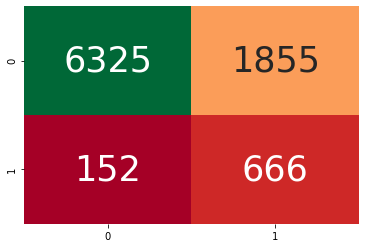

,Metric,Value
0,accuracy,0.776950
1,sensitivity/Recall,0.814181
2,specificity,0.773227
3,FPR,0.226773
4,FNR,0.185819
5,Precision,0.264181
6,NPV,0.976532


In [160]:
# Summarizing for uniformity
print("Final train data metrics for Decision Tree Model")
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))
print("Confusion matrix for test model is:")
sns.heatmap(confusionDt, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
plt.show()

print("\n")

func_metrics(confusionDt)

## Building a Random Forest Model

In [161]:
# Importing random forest classifier from sklearn library
# from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf_pca = RandomForestClassifier(class_weight='balanced',random_state=100,verbose=1,n_jobs=1)

rf_pca.fit(df_train_pca,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished


RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=100,
                       verbose=1)

In [162]:
pred_probs_train = rf_pca.predict_proba(df_train_pca)
print("Train data metrics")
print("ROC_AUC Score on train data is = {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1])))
y_pred_default = rf_pca.predict(df_train_pca)
confusion=confusion_matrix(y_train,y_pred_default)
print("Confusion matrix for train model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))
print("\n")
print("\n")

# Making predictions
print("Test data metrics")
y_pred_default1 = rf_pca.predict(df_test_pca)
pred_probs_test1 = rf_pca.predict_proba(df_test_pca)
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))
confusion=confusion_matrix(y_test,y_pred_default1)
print("Confusion matrix for test model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train data metrics
ROC_AUC Score on train data is = 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confusion matrix for train model is:
[[19221     0]
 [    0  1772]]


               Metric  Value
0            accuracy    1.0
1  sensitivity/Recall    1.0
2         specificity    1.0
3                 FPR    0.0
4                 FNR    0.0
5           Precision    1.0
6                 NPV    1.0




Test data metrics
ROC_AUC Score on test data is = 0.9
Confusion matrix for test model is:
[[8117   63]
 [ 606  212]]


               Metric     Value
0            accuracy  0.925650
1  sensitivity/Recall  0.259169
2         specificity  0.992298
3                 FPR  0.007702
4                 FNR  0.740831
5           Precision  0.770909
6                 NPV  0.930528


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


From the above metrics for train and test data, there appears to be severe overfitting. Hence, going for hyperparameter tuning.

#### Grid search for hyperparameter tuning

In [163]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

In [164]:
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=42,n_jobs=-1)
param1 = {
    'max_depth': [5,10,15,20],
    'n_estimators': [50,100,500,900]
}
# fit tree on training data
grid_search = GridSearchCV(rf, param1, 
                    cv=4,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,
                   scoring="recall")
grid_search.fit(df_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  3.8min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 500, 900]},
             return_train_score=True, scoring='recall', verbose=1)

In [165]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
2,36.660693,0.572844,0.433164,0.061426,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.735892,0.735892,0.735892,0.749436,0.739278,0.005865,1,0.790820,0.793078,0.801354,0.789315,0.793642,0.004650
3,71.680150,0.210118,0.791704,0.057678,5,900,"{'max_depth': 5, 'n_estimators': 900}",0.731377,0.733634,0.740406,0.740406,0.736456,0.004030,2,0.789315,0.791573,0.801354,0.788563,0.792701,0.005117
1,4.921077,0.069297,0.061084,0.003017,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.729120,0.731377,0.722348,0.735892,0.729684,0.004887,3,0.798345,0.791573,0.805869,0.782543,0.794582,0.008596
0,2.204197,0.051229,0.031908,0.000784,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.726862,0.720090,0.722348,0.738149,0.726862,0.006958,4,0.803612,0.787810,0.806622,0.787810,0.796464,0.008718
5,14.480394,0.180051,0.060779,0.006242,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.571106,0.589165,0.609481,0.602709,0.593115,0.014662,5,0.927013,0.911964,0.921746,0.914221,0.918736,0.005996
6,67.126775,0.127088,0.329825,0.064755,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.564334,0.584650,0.604966,0.600451,0.588600,0.015912,6,0.923251,0.920993,0.925508,0.911964,0.920429,0.005141
7,125.894032,0.511607,1.141031,0.063836,10,900,"{'max_depth': 10, 'n_estimators': 900}",0.568849,0.582393,0.595937,0.604966,0.588036,0.013684,7,0.923251,0.919488,0.927765,0.914221,0.921181,0.004973
4,6.366556,0.178674,0.036488,0.000842,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.562077,0.580135,0.613995,0.584650,0.585214,0.018640,8,0.909707,0.907449,0.922498,0.918736,0.914597,0.006216
8,9.847553,0.220705,0.033406,0.000829,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.435666,0.462754,0.455982,0.492099,0.461625,0.020222,9,0.992476,0.989466,0.992476,0.990971,0.991347,0.001248
9,18.362129,0.180221,0.054726,0.001575,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.440181,0.449210,0.474041,0.480813,0.461061,0.016845,10,0.996238,0.996990,0.995485,0.996238,0.996238,0.000532


In [166]:
rf_best = grid_search.best_estimator_

In [167]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [168]:
# Using max_depth =5 and n_estimators as 500 finding other parameters
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500,
                       n_jobs=-1, random_state=42)
param2 = {

    'min_samples_leaf':[250, 350, 450],
    'max_features': [10, 15, 20, 25],

}
# fit tree on training data
grid_search = GridSearchCV(rf, param2, 
                    cv=4,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,
                   scoring="recall")
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.6min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=5, n_estimators=500,
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [10, 15, 20, 25],
                         'min_samples_leaf': [250, 350, 450]},
             return_train_score=True, scoring='recall', verbose=1)

In [169]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
8,97.679610,0.140929,0.531842,0.070020,20,450,"{'max_features': 20, 'min_samples_leaf': 450}",0.785553,0.760722,0.778781,0.794582,0.779910,0.012415,1,0.796840,0.796840,0.807374,0.791573,0.798157,0.005740
7,100.832408,0.095947,0.554247,0.057431,20,350,"{'max_features': 20, 'min_samples_leaf': 350}",0.778781,0.762980,0.776524,0.796840,0.778781,0.012051,2,0.799097,0.799097,0.808126,0.793078,0.799850,0.005374
2,51.065277,0.228937,0.508523,0.071867,10,450,"{'max_features': 10, 'min_samples_leaf': 450}",0.781038,0.762980,0.772009,0.792325,0.777088,0.010870,3,0.790820,0.796840,0.806622,0.789315,0.795899,0.006801
11,96.432034,0.290683,0.290175,0.000927,25,450,"{'max_features': 25, 'min_samples_leaf': 450}",0.787810,0.751693,0.776524,0.790068,0.776524,0.015227,4,0.796840,0.793078,0.802859,0.792325,0.796275,0.004168
5,72.986867,0.185799,0.488229,0.061282,15,450,"{'max_features': 15, 'min_samples_leaf': 450}",0.783296,0.760722,0.772009,0.787810,0.775959,0.010512,5,0.794582,0.799097,0.808126,0.789315,0.797780,0.006904
6,102.672864,0.149036,0.580280,0.087103,20,250,"{'max_features': 20, 'min_samples_leaf': 250}",0.778781,0.758465,0.774266,0.792325,0.775959,0.012090,5,0.802859,0.795335,0.813394,0.795335,0.801731,0.007401
9,126.419526,0.253630,0.471340,0.065511,25,250,"{'max_features': 25, 'min_samples_leaf': 250}",0.778781,0.762980,0.769752,0.790068,0.775395,0.010158,7,0.808126,0.796840,0.814898,0.797592,0.804364,0.007543
10,113.228044,0.072999,0.376457,0.033306,25,350,"{'max_features': 25, 'min_samples_leaf': 350}",0.772009,0.758465,0.774266,0.796840,0.775395,0.013777,7,0.798345,0.796087,0.810384,0.793830,0.799661,0.006393
3,75.793721,0.189931,0.531556,0.075284,15,250,"{'max_features': 15, 'min_samples_leaf': 250}",0.769752,0.760722,0.776524,0.787810,0.773702,0.009888,9,0.797592,0.793830,0.814146,0.797592,0.800790,0.007863
4,75.696232,0.206670,0.429952,0.023462,15,350,"{'max_features': 15, 'min_samples_leaf': 350}",0.774266,0.762980,0.769752,0.778781,0.771445,0.005838,10,0.794582,0.800602,0.811136,0.791573,0.799473,0.007477


In [170]:
rf_best = grid_search.best_estimator_

In [171]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=20,
                       min_samples_leaf=450, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [172]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=20,
                       min_samples_leaf=450, n_estimators=500, n_jobs=-1,
                       random_state=42)
rf.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=20,
                       min_samples_leaf=450, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [173]:
pred_probs_train = rf.predict_proba(df_train_pca)
print("ROC_AUC Score on train data is = {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1])))
y_pred_default = rf.predict(df_train_pca)
confusion=confusion_matrix(y_train,y_pred_default)
print("Confusion matrix for train model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

print("\n")
# Making predictions
y_pred_default1 = rf.predict(df_test_pca)
pred_probs_test1 = rf.predict_proba(df_test_pca)
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))

confusionRf=confusion_matrix(y_test,y_pred_default1)
print("Confusion matrix for test model is:")
print(confusionRf)
print("\n")
print(func_metrics(confusionRf))

ROC_AUC Score on train data is = 0.9
Confusion matrix for train model is:
[[16035  3186]
 [  361  1411]]


               Metric     Value
0            accuracy  0.831039
1  sensitivity/Recall  0.796275
2         specificity  0.834244
3                 FPR  0.165756
4                 FNR  0.203725
5           Precision  0.306939
6                 NPV  0.977982


ROC_AUC Score on test data is = 0.88
Confusion matrix for test model is:
[[6853 1327]
 [ 196  622]]


               Metric     Value
0            accuracy  0.830740
1  sensitivity/Recall  0.760391
2         specificity  0.837775
3                 FPR  0.162225
4                 FNR  0.239609
5           Precision  0.319138
6                 NPV  0.972195


The train and test scores now look much more similar indicating that overfitting has been avoided.

Final test data metrics for Random Forest Model
ROC_AUC Score on test data is = 0.88
Confusion matrix for test model is:


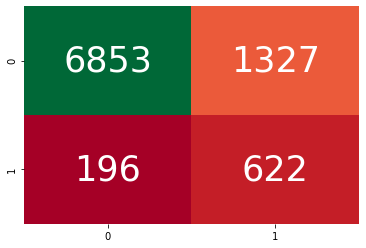

,Metric,Value
0,accuracy,0.830740
1,sensitivity/Recall,0.760391
2,specificity,0.837775
3,FPR,0.162225
4,FNR,0.239609
5,Precision,0.319138
6,NPV,0.972195


In [174]:
# Summarizing for uniformity
print("Final test data metrics for Random Forest Model")
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))
print("Confusion matrix for test model is:")
sns.heatmap(confusionRf, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
plt.show()

print("\n")
func_metrics(confusionRf)

## Displaying the metrics of different models generated 

In [175]:
# print(confusionLg)
# print("\n")
# print(confusionDt)
# print("\n")
# print(confusionRf)
# print("\n")

In [176]:
# print("Metrics for Logistic Regression Model: \n",func_metrics(confusionLg))
# print("\n")
# print("Metrics for Decision Tree Model: \n",func_metrics(confusionDt))
# print("\n")
# print("Metrics for Random Forest Model: \n",func_metrics(confusionRf))
# print("\n")

In [177]:
metricsDf = func_metrics(confusionLg).merge(func_metrics(confusionDt),on='Metric')
metricsDf = metricsDf.merge(func_metrics(confusionRf),on='Metric')
metricsDf.columns = ['Metrics','Logistic Regression','Decision Tree', 'Random Forest']
metricsDf

,Metrics,Logistic Regression,Decision Tree,Random Forest
0,accuracy,0.842854,0.776950,0.830740
1,sensitivity/Recall,0.827628,0.814181,0.760391
2,specificity,0.844377,0.773227,0.837775
3,FPR,0.155623,0.226773,0.162225
4,FNR,0.172372,0.185819,0.239609
5,Precision,0.347179,0.264181,0.319138
6,NPV,0.979994,0.976532,0.972195


Of the three models, the logistic regression model appears to give best sensitivity. Since we need to identify the churns correctly, this would be the best model for us.

While we are able to predict the churns with a good deal of sensitivity with  the decision tree model, we have used PCA for ensuring least information loss. 



### Building a highly interpretable model
We need another model to be able to identify the important variables for predicting churn. We will go for Random Forest for best interpretability.

In [178]:
# Importing random forest classifier from sklearn library
# from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfInt = RandomForestClassifier(class_weight='balanced',random_state=100,verbose=1,n_jobs=1)

rfInt.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.0s finished


RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=100,
                       verbose=1)

In [179]:
pred_probs_train = rfInt.predict_proba(X_train)
print("Train data metrics")
print("ROC_AUC Score on train data is = {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1])))
y_pred_default = rfInt.predict(X_train)
confusion=confusion_matrix(y_train,y_pred_default)
print("Confusion matrix for train model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

print("\n")
print("\n")

# Making predictions
y_pred_default1 = rfInt.predict(X_test)
pred_probs_test1 = rfInt.predict_proba(X_test)
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))
confusion=confusion_matrix(y_test,y_pred_default1)
print("Confusion matrix for test model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train data metrics
ROC_AUC Score on train data is = 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confusion matrix for train model is:
[[19221     0]
 [    1  1771]]


               Metric     Value
0            accuracy  0.999952
1  sensitivity/Recall  0.999436
2         specificity  1.000000
3                 FPR  0.000000
4                 FNR  0.000564
5           Precision  1.000000
6                 NPV  0.999948




ROC_AUC Score on test data is = 0.92
Confusion matrix for test model is:
[[8079  101]
 [ 464  354]]


               Metric     Value
0            accuracy  0.937208
1  sensitivity/Recall  0.432763
2         specificity  0.987653
3                 FPR  0.012347
4                 FNR  0.567237
5           Precision  0.778022
6                 NPV  0.945687


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


From the above metrics for train and test data, there appears to be severe overfitting. Hence, going for hyperparameter tuning.

#### Grid search for hyperparameter tuning

In [180]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

In [181]:
# instantiate the model
rfInt1 = RandomForestClassifier(class_weight='balanced',random_state=42,n_jobs=-1)
param1 = {
    'max_depth': [5,10,15,20],
    'n_estimators': [50,100,500,900]
}
# fit tree on training data
grid_search = GridSearchCV(rfInt1, param1, 
                    cv=4,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,
                   scoring="recall")
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  2.9min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 500, 900]},
             return_train_score=True, scoring='recall', verbose=1)

In [182]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.232884,0.027427,0.036582,0.000708,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.799097,0.821670,0.772009,0.801354,0.798533,0.017657,1,0.828442,0.834462,0.841234,0.841234,0.836343,0.005334
3,45.273789,0.407934,1.021331,0.073242,5,900,"{'max_depth': 5, 'n_estimators': 900}",0.790068,0.826185,0.781038,0.796840,0.798533,0.016921,1,0.831452,0.836719,0.851768,0.841986,0.840482,0.007506
2,19.771992,0.286412,0.440033,0.062551,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.790068,0.823928,0.781038,0.794582,0.797404,0.016071,3,0.833710,0.837472,0.850263,0.844244,0.841422,0.006349
1,1.839566,0.006366,0.088550,0.004927,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.799097,0.821670,0.774266,0.787810,0.795711,0.017376,4,0.834462,0.827690,0.846501,0.837472,0.836531,0.006759
5,7.731891,0.100538,0.072513,0.004600,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.681716,0.683973,0.677201,0.674944,0.679458,0.003569,5,0.937547,0.934537,0.945071,0.939804,0.939240,0.003851
4,3.011259,0.200183,0.042561,0.000506,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.679458,0.677201,0.679458,0.674944,0.677765,0.001872,6,0.933032,0.940557,0.941309,0.941309,0.939052,0.003489
6,46.374573,0.105338,0.375195,0.029169,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.672686,0.672686,0.672686,0.681716,0.674944,0.003910,7,0.941309,0.936795,0.948081,0.942062,0.942062,0.004017
7,97.092453,0.474475,1.770313,0.106778,10,900,"{'max_depth': 10, 'n_estimators': 900}",0.672686,0.665914,0.674944,0.677201,0.672686,0.004223,8,0.942814,0.938299,0.948834,0.942062,0.943002,0.003776
8,7.995117,0.215314,0.045570,0.000575,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.571106,0.571106,0.582393,0.580135,0.576185,0.005141,9,0.992476,0.993980,0.995485,0.993980,0.993980,0.001064
9,15.301854,0.210195,0.089667,0.008415,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.562077,0.566591,0.580135,0.575621,0.571106,0.007138,10,0.996990,0.996238,0.997743,0.997743,0.997178,0.000624


In [183]:
rf_best = grid_search.best_estimator_

In [184]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [185]:
# Using max_depth =5 and n_estimators as 500 finding other parameters
# instantiate the model
rfInt2 = RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       n_jobs=-1, random_state=42)
param2 = {

    'min_samples_leaf':[250, 350, 450],
    'max_features': [10, 15, 20, 25],

}
# fit tree on training data
grid_search = GridSearchCV(rfInt2, param2, 
                    cv=4,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,
                   scoring="recall")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   13.4s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=5, n_estimators=50,
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [10, 15, 20, 25],
                         'min_samples_leaf': [250, 350, 450]},
             return_train_score=True, scoring='recall', verbose=1)

In [186]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
11,4.566156,0.171442,0.065500,0.001178,25,450,"{'max_features': 25, 'min_samples_leaf': 450}",0.839729,0.864560,0.814898,0.841986,0.840293,0.017585,1,0.843491,0.848758,0.863807,0.859293,0.853837,0.008093
10,5.441376,0.047444,0.057987,0.001786,25,350,"{'max_features': 25, 'min_samples_leaf': 350}",0.841986,0.851016,0.819413,0.830700,0.835779,0.011878,2,0.839729,0.847254,0.860045,0.864560,0.852897,0.009904
9,5.493084,0.070088,0.055987,0.000796,25,250,"{'max_features': 25, 'min_samples_leaf': 250}",0.832957,0.844244,0.821670,0.821670,0.830135,0.009358,3,0.841986,0.842739,0.857788,0.851768,0.848570,0.006568
8,3.939779,0.181549,0.057232,0.000919,20,450,"{'max_features': 20, 'min_samples_leaf': 450}",0.837472,0.848758,0.805869,0.819413,0.827878,0.016463,4,0.838977,0.837472,0.841986,0.845749,0.841046,0.003165
7,4.375810,0.124873,0.057913,0.000965,20,350,"{'max_features': 20, 'min_samples_leaf': 350}",0.837472,0.841986,0.810384,0.817156,0.826749,0.013295,5,0.833710,0.824680,0.846501,0.848758,0.838412,0.009787
5,3.257074,0.160391,0.054378,0.000871,15,450,"{'max_features': 15, 'min_samples_leaf': 450}",0.832957,0.841986,0.808126,0.821670,0.826185,0.012669,6,0.837472,0.829947,0.849511,0.835214,0.838036,0.007166
4,2.940090,0.174507,0.054287,0.001123,15,350,"{'max_features': 15, 'min_samples_leaf': 350}",0.835214,0.837472,0.805869,0.814898,0.823363,0.013390,7,0.835214,0.829947,0.844244,0.841986,0.837848,0.005643
6,4.059552,0.043086,0.058756,0.001197,20,250,"{'max_features': 20, 'min_samples_leaf': 250}",0.830700,0.839729,0.803612,0.814898,0.822235,0.013949,8,0.837472,0.829195,0.853273,0.844244,0.841046,0.008845
3,2.926879,0.006122,0.068990,0.002624,15,250,"{'max_features': 15, 'min_samples_leaf': 250}",0.821670,0.832957,0.796840,0.812641,0.816027,0.013211,9,0.827690,0.821670,0.839729,0.839729,0.832205,0.007820
2,2.354143,0.077560,0.054684,0.001028,10,450,"{'max_features': 10, 'min_samples_leaf': 450}",0.814898,0.835214,0.796840,0.801354,0.812077,0.014920,10,0.819413,0.826185,0.833710,0.827690,0.826749,0.005086


In [187]:
rf_best = grid_search.best_estimator_

In [188]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=25,
                       min_samples_leaf=450, n_estimators=50, n_jobs=-1,
                       random_state=42)

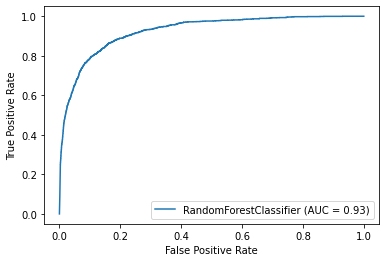

In [189]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [190]:
rfIntF = RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=25,
                       min_samples_leaf=450, n_estimators=50, n_jobs=-1,
                       random_state=42)
rfIntF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=25,
                       min_samples_leaf=450, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [191]:
pred_probs_train = rfIntF.predict_proba(X_train)
print("ROC_AUC Score on train data is = {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1])))
y_pred_default = rfIntF.predict(X_train)
confusion=confusion_matrix(y_train,y_pred_default)
print("Confusion matrix for train model is:")
print(confusion)
print("\n")
print(func_metrics(confusion))

print("\n")
# Making predictions
y_pred_default1 = rfIntF.predict(X_test)
pred_probs_test1 = rfIntF.predict_proba(X_test)
print("ROC_AUC Score on test data is = {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test1[:,1])))

confusionRfInt=confusion_matrix(y_test,y_pred_default1)
print("Confusion matrix for test model is:")
print(confusionRfInt)
print("\n")
print(func_metrics(confusionRfInt))

ROC_AUC Score on train data is = 0.93
Confusion matrix for train model is:
[[16255  2966]
 [  264  1508]]


               Metric     Value
0            accuracy  0.846139
1  sensitivity/Recall  0.851016
2         specificity  0.845690
3                 FPR  0.154310
4                 FNR  0.148984
5           Precision  0.337059
6                 NPV  0.984018


ROC_AUC Score on test data is = 0.91
Confusion matrix for test model is:
[[6945 1235]
 [ 137  681]]


               Metric     Value
0            accuracy  0.847522
1  sensitivity/Recall  0.832518
2         specificity  0.849022
3                 FPR  0.150978
4                 FNR  0.167482
5           Precision  0.355428
6                 NPV  0.980655


The train and test scores now look much more similar indicating that overfitting has been avoided.

We can now use this model to identify the important features that can help predict churn.

### Determining Important Features

In [192]:
rf_best.feature_importances_

array([6.95582103e-04, 5.29006390e-04, 5.24989841e-02, 2.74220879e-04,
       9.54317643e-05, 1.07253489e-03, 5.23527732e-04, 1.19370752e-04,
       2.88266273e-03, 0.00000000e+00, 2.08143944e-03, 1.08532193e-01,
       0.00000000e+00, 1.30838050e-03, 1.54591517e-01, 2.17117068e-05,
       2.53793516e-03, 1.26202053e-02, 1.98426267e-03, 4.51068221e-03,
       3.44592988e-02, 7.16841358e-04, 1.07637676e-03, 3.64836663e-03,
       0.00000000e+00, 0.00000000e+00, 4.39439043e-04, 1.76453010e-04,
       3.34266497e-04, 6.96323911e-04, 2.24759976e-04, 4.62155836e-04,
       8.42225492e-04, 8.37165944e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.62426100e-04, 3.74943531e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.71139353e-04, 4.38354866e-03,
       6.19971263e-05, 4.01728355e-04, 5.33149099e-02, 0.00000000e+00,
       2.57934541e-03, 7.08134685e-03, 6.57973798e-05, 2.78529661e-04,
      

In [193]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [194]:
imp_df.sort_values(by="Imp", ascending=False,inplace=True)
imp_df.head(25)

,Varname,Imp
14,roam_og_mou_8,0.154592
77,total_rech_amt_8,0.133193
11,roam_ic_mou_8,0.108532
126,total_rech_amt_diff,0.094300
116,arpu_diff,0.085416
50,loc_ic_t2m_mou_8,0.053315
2,arpu_8,0.052499
120,roam_og_mou_diff,0.050966
80,max_rech_amt_8,0.042036
83,last_day_rch_amt_8,0.041857


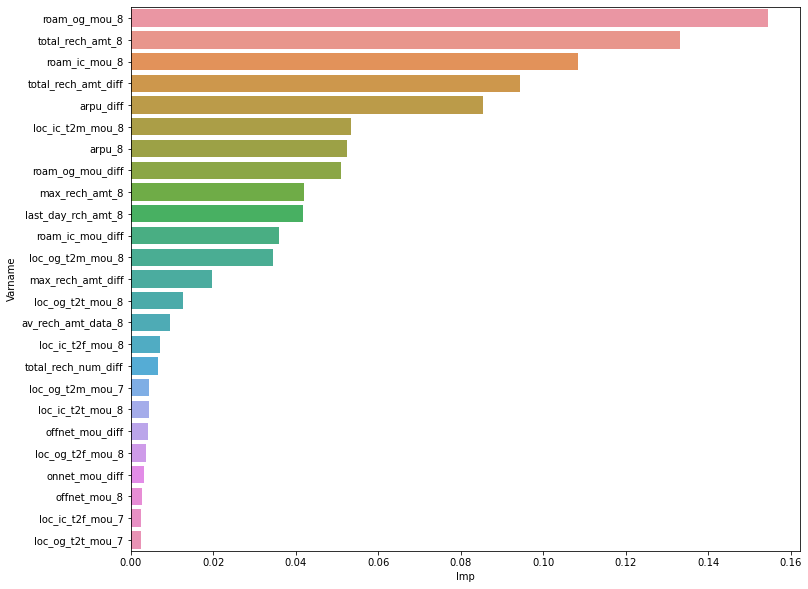

In [195]:
plt.figure(figsize=(12,10))
sns.barplot(data=imp_df, x= imp_df['Imp'][:25], y=imp_df['Varname'][:25],orient='h');

### The top 25 predictors for churn are as follows:
1. **roam_og_mou_8** - outgoing roaming calls minutes of usage in month 8
2. **total_rech_amt_8** - total recharge amount in month 8
3. **roam_ic_mou_8** - incoming roaming calls minutes of usage in month 8
4. **total_rech_amt_diff** - difference in total recharge amount between month 8 and average of months 6 and 7
5. **arpu_diff** - difference in average revenue per user between month 8 and average of months 6 and 7
6. **loc_ic_t2m_mou_8** - local incoming calls minutes of usage from other mobile operators in month 8
7. **arpu_8** - average revenue per user in month 8
8. **roam_og_mou_diff** - difference in outgoing roaming calls minutes of usage between months 8 and average of months 6 and 7
9. **max_rech_amt_8** - maximum recharge amount in month 8
10. **last_day_rch_amt_8** - last recharge amount in month 8
11. **roam_ic_mou_diff** - difference in incoming roaming calls minutes of usage between months 8 and average of months 6 and 7
12. **loc_og_t2m_mou_8** - local outgoing minutes of usage from operator to other operator mobiles in month 8
13. **max_rech_amt_diff** - differnce in maximum recharge amount between month 8 and average of months 6 and 7
14. **loc_og_t2t_mou_8** - Total outgoing local minutes of usage within same operator (mobile to mobile) in month 8
15. **av_rech_amt_data_8** - average recharge amount for data in month 8
16. **loc_ic_t2f_mou_8** - local incoming calls minutes of usage from same operator fixed line in month 8
17. **total_rech_num_diff** - difference in total number of recharges between month 8 and average of months 6 and 7
18. **loc_og_t2m_mou_7** - local outgoing minutes of usage from operator to other operator mobiles in month 7
19. **loc_ic_t2t_mou_8** - Total incoming local minutes of usage within same operator (mobile to mobile) in month 7
20. **offnet_mou_diff** - difference in all kind of calls outside the operator T network minutes of usage between month 8 and average of months 6 and 7
21. **loc_og_t2f_mou_8** - local outgoing calls minutes of usage to same operator fixed line in month 8
22. **onnet_mou_diff** - difference in all kind of calls within the same operator network minutes of usage between month 8 and average of months 6 and 7
23. **offnet_mou_8** - All kind of calls outside the operator T network minutes of usage in month 8
24. **loc_ic_t2f_mou_7** - local incoming calls minutes of usage from same operator fixed line in month 7
25. **loc_og_t2t_mou_7** - Total outgoing local minutes of usage within same operator (mobile to mobile) in month 7


## Recommended Strategies



   *	Most important factors that required the Telcom company to focus on it are :the incoming, outgoing voice calls minutes of usage and internet data volume used by the customer*

   *	There is high probability that the customer  will leave the company. If there is no incoming calls or no internet usage.*
   *	Company need to provide good offers to the customers to encourage voice call and internet services which are main levers of telecom service.
   *	 The company needs to keep and eye on the difference in recharge and usage between the current month and prior months. A large difference appears to indicate the possibility of churn.
   *	The company needs to focus on the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone. High roaming usage will effect the customer behaviour.
   *	Company needs to observe the customer behaviour of recharges for voice calls and data. Recharge pattern of the customers will indicate the interest in continuing the mobile network.**

